In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Charger le fichier re-téléversé
file_path = 'ML-HYDPARK_v0.0.5.csv'
data = pd.read_csv(file_path)

# Étape 1 : Inspection initiale
# Afficher les premières lignes du dataset et des informations générales
data_info = data.info()
data_head = data.head()

# Vérifier les valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

data_info, data_head, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          772 non-null    int64  
 1   index                               772 non-null    int64  
 2   Material_Class                      747 non-null    object 
 3   Composition_Formula                 772 non-null    object 
 4   Hydrogen_Weight_Percent             741 non-null    float64
 5   Heat_of_Formation_kJperMolH2        772 non-null    float64
 6   Temperature_oC                      412 non-null    float64
 7   Pressure_Atmospheres_Absolute       403 non-null    float64
 8   Entropy_of_Formation_JperMolH2perK  772 non-null    float64
 9   Equilibrium_Pressure_25C            770 non-null    float64
 10  LnEquilibrium_Pressure_25C          772 non-null    float64
 11  HtoM                                741 non-n

(None,
    Unnamed: 0  index Material_Class Composition_Formula  \
 0           0      0            A2B               Th2Al   
 1           1      1            A2B               Ti2Cu   
 2           2      2            A2B               Zr2Cu   
 3           3      3            A2B               Zr2Ni   
 4           4      4            A2B               Mg2Ni   
 
    Hydrogen_Weight_Percent  Heat_of_Formation_kJperMolH2  Temperature_oC  \
 0                      0.8                         130.0           500.0   
 1                      2.2                         130.0           500.0   
 2                      1.3                         144.0           600.0   
 3                      1.3                         183.0           604.0   
 4                      3.6                          64.5           299.0   
 
    Pressure_Atmospheres_Absolute  Entropy_of_Formation_JperMolH2perK  \
 0                          0.001                          110.711134   
 1                   

# Quelques fonctions de visualisation bah dakchi iban zwin

In [ ]:
def affichernawfallbogos(x):
    plt.scatter(range(len(data[x])), data[x], alpha=0.7)
    plt.title(x + " vs. Index")
    plt.xlabel("Index")
    plt.grid(True)
    plt.show()


In [ ]:
def vs(xx,yy):
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=xx, y=yy, hue="Material_Class", data=data)
  plt.title("Relation entre "+xx+" et "+yy+" par classe")
  plt.xlabel(xx)
  plt.ylabel(yy)
  plt.legend(title="Classe")
  plt.grid(True)
  plt.show()

In [ ]:
def corr(feature1, feature2):
  correlation = data[feature1].corr(data[feature2])

# Afficher le résultat
  return f"La corrélation entre {feature1} et {feature2} est : {correlation}"

In [ ]:
def vs2(xx, yy, x_range=None, y_range=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=xx, y=yy, hue="Material_Class", data=data)
    plt.title("Relation entre " + xx + " et " + yy + " par classe")
    plt.xlabel(xx)
    plt.ylabel(yy)
    plt.legend(title="Classe")
    plt.grid(True)

    if x_range:
        plt.xlim(x_range)
    if y_range:
        plt.ylim(y_range)

    plt.show()

In [ ]:
def correlation_with_feature(data, feature):
    """
    Affiche la corrélation entre une feature donnée et toutes les autres features numériques du DataFrame.

    :param data: DataFrame contenant les données.
    :param feature: Nom de la feature pour laquelle calculer les corrélations.
    """
    # Vérifier si la feature existe dans le DataFrame
    if feature not in data.columns:
        print(f"La feature '{feature}' n'existe pas dans le DataFrame.")
        return

    # Calculer les corrélations
    correlations = data.corr()[feature]

    # Trier les corrélations par ordre décroissant (valeurs absolues)
    correlations_sorted = correlations.abs().sort_values(ascending=False)

    # Afficher les corrélations
    print(f"Corrélations avec la feature '{feature}':")
    print(correlations_sorted)

    # Optionnel : Visualisation sous forme de barre
    correlations_sorted.drop(feature).plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title(f"Corrélations avec '{feature}'")
    plt.ylabel("Coefficient de corrélation")
    plt.xlabel("Features")
    plt.grid(axis='y')
    plt.show()


Ahia , 3lach il ya Equilibrium pressure et LnEquilibrium Pressure, hmmm hadchi khasso t79i9

##Equilibrium_Pressure Vs LnEquilibrium_Pressure

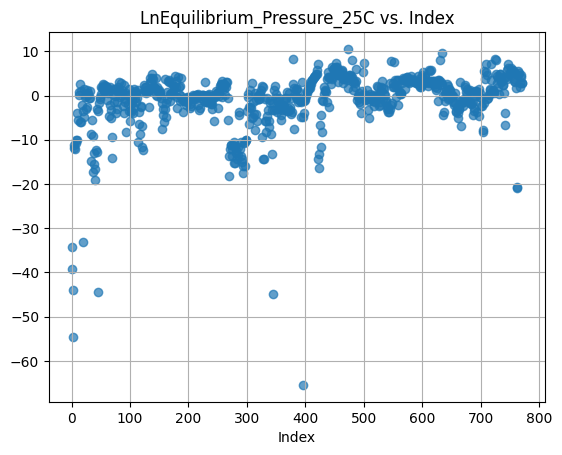

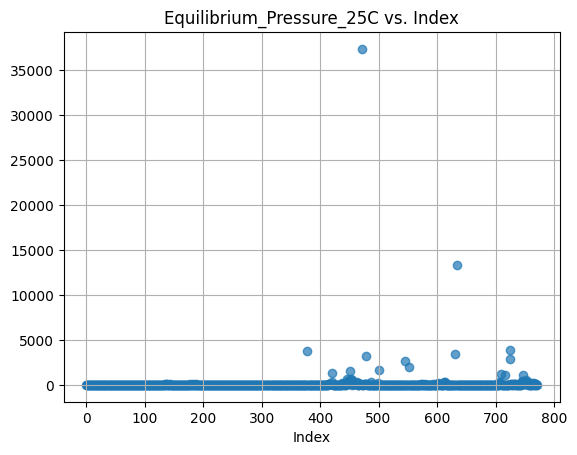

In [ ]:
affichernawfallbogos("LnEquilibrium_Pressure_25C")
affichernawfallbogos("Equilibrium_Pressure_25C")

YASALAAAAAAAM


#### 1. Pourquoi appliquer le logarithme naturel (ln) ?
L’application du **logarithme naturel (`ln`)** sur la pression d’équilibre (**`Equilibrium_Pressure_25C`**) est une transformation mathématique essentielle pour plusieurs raisons :

- **Réduction de l’échelle des valeurs** :
  - Les valeurs de `Equilibrium_Pressure_25C` varient sur plusieurs ordres de grandeur (allant de très petites pressions à des valeurs extrêmement grandes, > 35 000).
  - En prenant le logarithme, cette plage de valeurs est compressée, rendant l’analyse et la visualisation plus simples et significatives.

- **Meilleure gestion des données asymétriques** :
  - Les données brutes sont fortement asymétriques, avec une concentration importante de valeurs proches de zéro et quelques valeurs extrêmes très élevées.
  - La transformation logarithmique rend la distribution plus symétrique, facilitant les analyses statistiques.

---

#### 2. Pourquoi le logarithme est-il plus corrélé avec d’autres variables ?
**a. Relation linéaire après transformation logarithmique :**
- En thermodynamique, l’équation de Van’t Hoff établit une relation linéaire entre `ln(P)` (logarithme de la pression) et d’autres variables comme la chaleur de formation (\( \Delta H \)) :

  $\ln(P_{eq}) = -\frac{\Delta H}{RT} + \frac{\Delta S}{R}$

- Grâce à cette transformation, les relations complexes entre les variables deviennent **plus simples et linéaires**.

**b. Réduction de l’impact des valeurs extrêmes :**
- Les valeurs très élevées ou faibles de `Equilibrium_Pressure_25C` peuvent fausser les corrélations lorsqu’elles dominent les calculs.
- En appliquant le logarithme, on réduit cet effet, permettant une meilleure comparaison entre toutes les observations.

**c. Révélation des relations cachées :**
- Une relation exponentielle dans les données brutes devient **linéaire** après la transformation logarithmique, rendant les dépendances plus visibles.

---

#### 3. Analyse des graphiques
**a. Graphique de `LnEquilibrium_Pressure_25C` :**
- Les valeurs sont mieux réparties sur l’axe vertical, rendant la distribution plus homogène.
- Cela facilite l’analyse des corrélations avec d’autres variables comme la chaleur de formation.

**b. Graphique de `Equilibrium_Pressure_25C` :**
- La majorité des points se concentre près de zéro, tandis que quelques valeurs très élevées (outliers) dominent, rendant difficile la visualisation des tendances.

---

#### 4. Avantages de `ln` pour l’analyse des corrélations
- **Alignement avec les relations thermodynamiques** :
  - Des variables comme la chaleur de formation $\Delta H $ ou l’entropie $\Delta S$ sont directement corrélées à $ln(P)$ et non à $P
$.
- **Réduction des biais** :
  - Les valeurs extrêmes sont atténuées, ce qui améliore la qualité des corrélations.
- **Facilitation de la visualisation** :
  - Une relation linéaire est plus facile à interpréter qu’une relation exponentielle ou asymétrique.

---

#### 5. Conclusion
- La transformation logarithmique est essentielle pour analyser correctement les données liées à la pression d’équilibre.
- `LnEquilibrium_Pressure_25C` est plus corrélé aux variables thermodynamiques et offre une meilleure visualisation et interprétation des relations avec d'autres propriétés du matériau.


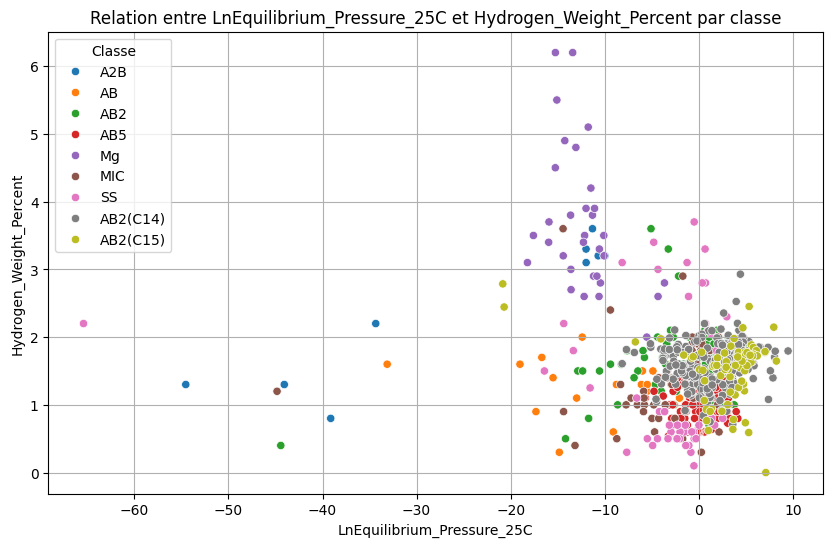

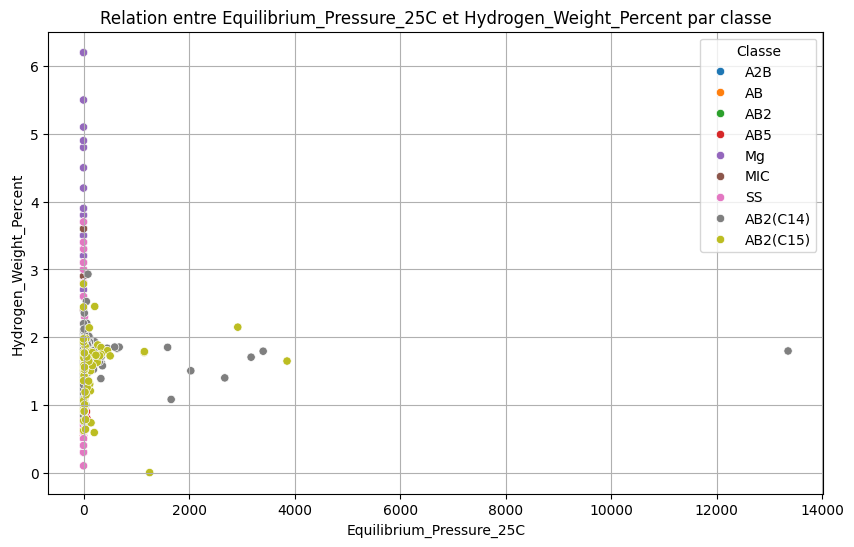

In [ ]:
vs("LnEquilibrium_Pressure_25C","Hydrogen_Weight_Percent")
vs("Equilibrium_Pressure_25C","Hydrogen_Weight_Percent")

### Analyse du graphique : Relation entre LnEquilibrium\_Pressure\_25C et Hydrogen\_Weight\_Percent par classe

#### 1. Observation générale
- Le graphique représente la relation entre le logarithme naturel de la pression d'équilibre à 25°C ($LnEquilibrium\_Pressure\_25C$) et le pourcentage massique d’hydrogène ($Hydrogen\_Weight\_Percent$).
- Les données sont réparties sur une large plage de valeurs de $LnEquilibrium\_Pressure\_25C$, allant de -60 à environ 10.
- Une **forte concentration de points** se situe dans une plage relativement étroite autour de $LnEquilibrium\_Pressure\_25C \approx 0$.

---

#### 2. Analyse des zones spécifiques
##### **a. Zone de $LnEquilibrium\_Pressure\_25C$ proche de 0 (dominante)**
- La majorité des points se trouve dans cette zone, avec une dispersion relativement faible.
- Les valeurs de $Hydrogen\_Weight\_Percent$ dans cette région varient de **1% à 4%**, ce qui montre que les matériaux ayant une pression d’équilibre modérée sont les plus fréquents et présentent des performances typiques en termes de stockage gravimétrique.

##### **b. Zone de $LnEquilibrium\_Pressure\_25C$ négative (< -20)**
- Dans cette région, la pression d'équilibre est très faible (exponentielle négative du logarithme).
- Les matériaux ayant des **valeurs basses de $LnEquilibrium\_Pressure\_25C$** stockent bien l’hydrogène mais nécessitent des températures élevées pour désorber, limitant leur utilisation pratique.
- Les **classes dominantes** ici incluent les matériaux de type `AB2`, `Mg`, et quelques classes `AB5`.

##### **c. Zone de $Hydrogen\_Weight\_Percent$ élevée (> 4%)**
- Seuls quelques matériaux atteignent un pourcentage massique supérieur à 4%.
- Ces points appartiennent principalement à la classe `Mg`, connue pour ses propriétés prometteuses pour le stockage gravimétrique d’hydrogène.

---

#### 3. Analyse par classe
##### **a. Classe `Mg`**
- Les points associés à cette classe ont les valeurs de $Hydrogen\_Weight\_Percent$ les plus élevées, atteignant jusqu’à **6%**.
- Cela confirme que les hydrures de magnésium sont des candidats idéaux pour un stockage efficace.

##### **b. Classes `AB2(C14)` et `AB2(C15)`**
- Ces matériaux sont concentrés autour de **1-2%** pour $Hydrogen\_Weight\_Percent$, avec des valeurs modérées de $LnEquilibrium\_Pressure\_25C$ (proche de 0).
- Ces classes sont adaptées pour des applications nécessitant une désorption facile à température ambiante.

##### **c. Classes `A2B` et `AB5`**
- Ces classes ont des valeurs variées pour $LnEquilibrium\_Pressure\_25C$, allant de **-40 à 0**.
- Elles présentent un $Hydrogen\_Weight\_Percent$ limité à **1-3%**, reflétant leur faible capacité gravimétrique.

---

#### 4. Interprétation physique
- **Faibles valeurs de $LnEquilibrium\_Pressure\_25C$ (< -20)** :
  - Ces matériaux ont une pression d'équilibre très basse, indiquant des liaisons fortes avec l’hydrogène. Ils nécessitent des températures élevées pour libérer l’hydrogène.
- **Valeurs proches de 0 de $LnEquilibrium\_Pressure\_25C$** :
  - Correspondent à des pressions d'équilibre modérées, rendant ces matériaux plus pratiques pour des applications industrielles.
- **Hydrogen\_Weight\_Percent élevé** :
  - Les matériaux contenant des éléments légers (comme le magnésium) dominent cette région.

---

#### 5. Implications pour le choix des matériaux
- **Matériaux optimaux :**
  - Ceux ayant des **valeurs modérées de $LnEquilibrium\_Pressure\_25C$** (proche de 0) et un **$Hydrogen\_Weight\_Percent$ supérieur à 3%** sont les plus prometteurs pour des applications pratiques.
- **Matériaux moins pratiques :**
  - Ceux ayant des valeurs très négatives de $LnEquilibrium\_Pressure\_25C$ (< -20) présentent de bonnes capacités de stockage, mais sont limités par les températures élevées nécessaires pour désorber l’hydrogène.

---

### **Conclusion**
Le graphique met en évidence une concentration des matériaux autour de $LnEquilibrium\_Pressure\_25C \approx 0$ avec des performances de stockage modérées (**1-4% Hydrogen\_Weight\_Percent**). Les classes `Mg` et `AB2` semblent les plus intéressantes pour des applications nécessitant un compromis entre capacité gravimétrique et désorption à des pressions et températures pratiques.


## Heat of Formation

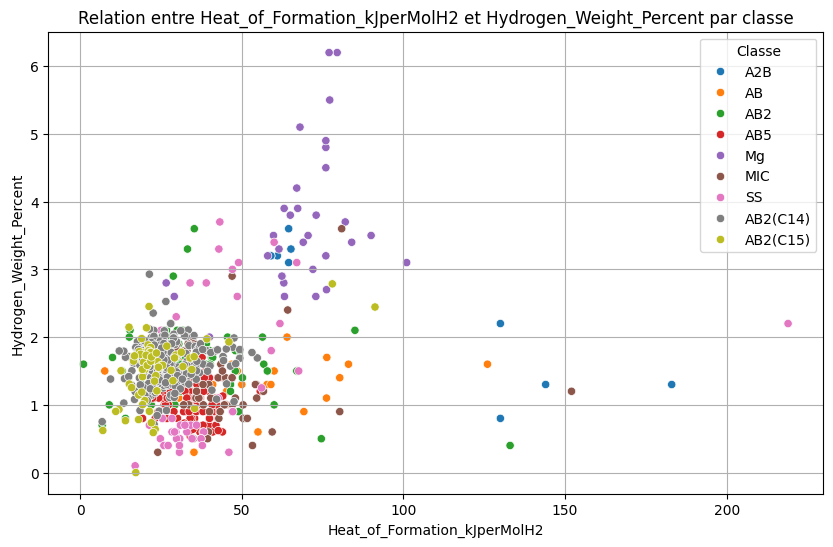

In [ ]:
vs("Heat_of_Formation_kJperMolH2","Hydrogen_Weight_Percent")


### Analyse du graphique : Heat_of_Formation_kJperMolH2 vs Hydrogen_Weight_Percent

#### 1. Observation générale
- Le graphique montre une **corrélation faible** entre la chaleur de formation et le pourcentage massique d’hydrogène.
- Les données sont largement dispersées, ce qui indique qu'il n'y a pas de relation linéaire ou évidente entre ces deux variables.

#### 2. Analyse par zones
**a. Zone de chaleur de formation faible (0 - 50 kJ/mol H₂)**  
- La majorité des matériaux se trouvent dans cette plage.  
- **Hydrogen_Weight_Percent** varie fortement dans cette région, entre **1% et 6%**, selon la classe du matériau.  
- Cette plage de chaleur de formation correspond aux matériaux ayant une bonne capacité de stockage et des conditions de désorption modérées.

**b. Zone de chaleur de formation modérée (50 - 100 kJ/mol H₂)**  
- Moins de points sont présents dans cette zone.  
- **Hydrogen_Weight_Percent** tend à diminuer légèrement avec l'augmentation de la chaleur de formation, indiquant que des liaisons plus fortes avec l’hydrogène réduisent la capacité de stockage gravimétrique.

**c. Zone de chaleur de formation élevée (> 100 kJ/mol H₂)**  
- Très peu de matériaux sont présents ici, et leur **Hydrogen_Weight_Percent** est généralement inférieur à **1%**.  
- Ces matériaux ont des liaisons très fortes entre le métal et l’hydrogène, rendant la désorption difficile à des températures pratiques.

#### 3. Analyse par classes
**a. Matériaux de la classe `Mg`**  
- Les points appartenant à cette classe ont les valeurs les plus élevées de **Hydrogen_Weight_Percent** (> 4%).  
- Ces matériaux sont prometteurs pour le stockage gravimétrique, bien que leur chaleur de formation modérée (30 - 50, kJ/mol H₂) pourrait nécessiter des températures spécifiques pour la désorption.

**b. Matériaux de la classe `AB2(C14)` et `AB2(C15)`**  
- Ces matériaux sont concentrés dans la région de faible **Hydrogen_Weight_Percent** (1% - 2%).  
- Leur faible capacité est due à une composition chimique souvent dominée par des éléments lourds.

**c. Matériaux de la classe `A2B` et `AB5`**  
- Présents majoritairement dans la zone basse de **Hydrogen_Weight_Percent** (1% - 3%) et de faible chaleur de formation ( 50 \, kJ/mol H₂).  
- Ces matériaux sont adaptés pour des cycles rapides d'absorption/désorption mais offrent des capacités de stockage limitées.

#### 4. Implications physiques
- **Chaleur de formation modérée (30-50 kJ/mol H₂)** :  
  - Matériaux comme le **MgH₂** sont optimaux, car ils assurent un bon équilibre entre stockage gravimétrique et désorption facile.
- **Chaleur de formation élevée (> 100 kJ/mol H₂)** :  
  - Ces matériaux retiennent trop fortement l’hydrogène, rendant leur utilisation impratique pour des applications nécessitant une désorption facile.

#### 5. Conclusion et recommandations
- Les matériaux contenant des éléments légers (comme Mg) offrent des valeurs élevées de **Hydrogen_Weight_Percent**, ce qui en fait des candidats prometteurs pour le stockage gravimétrique.
- Les matériaux avec des chaleurs de formation trop faibles (< 30 kJ/mol H₂) peuvent être instables, tandis que ceux avec des chaleurs trop élevées (> 100 kJ/mol H₂) ne sont pas pratiques pour une désorption facile.
- Les zones prometteuses pour des applications industrielles et mobiles se trouvent autour de **30-50 kJ/mol H₂**, avec des matériaux offrant une **Hydrogen_Weight_Percent** d'au moins 3%.



In [ ]:
corr("Heat_of_Formation_kJperMolH2", "LnEquilibrium_Pressure_25C")

'La corrélation entre Heat_of_Formation_kJperMolH2 et LnEquilibrium_Pressure_25C est : -0.938140514167802'

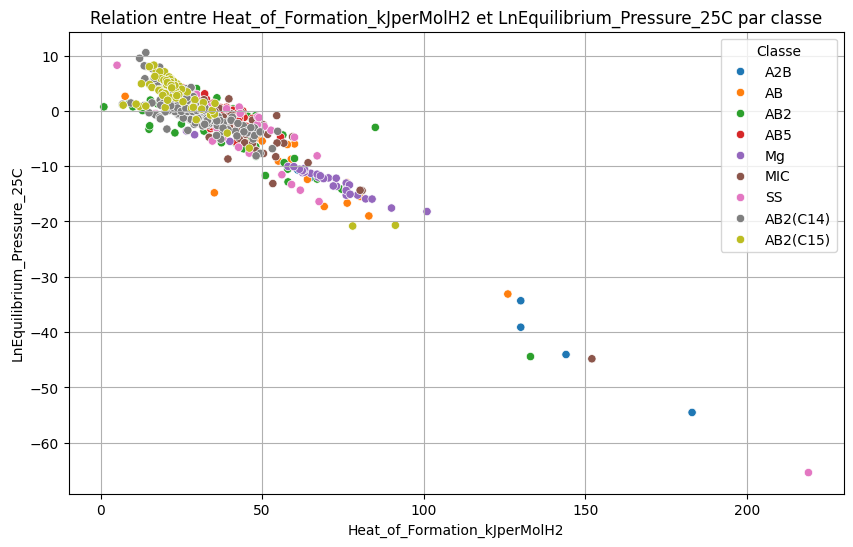

In [ ]:
vs("Heat_of_Formation_kJperMolH2","LnEquilibrium_Pressure_25C")

### Analyse : Corrélation entre `Heat_of_Formation_kJperMolH2` et `LnEquilibrium_Pressure_25C`

#### **1. Relation thermodynamique fondamentale**
La forte corrélation négative entre `Heat_of_Formation_kJperMolH2` $\Delta H$ et `LnEquilibrium_Pressure_25C` $\ln(P_{eq})$ peut être expliquée par l'équation de Van’t Hoff :


$\ln(P_{eq}) = -\frac{\Delta H}{RT} + \frac{\Delta S}{R}$

Où :
- $\ln(P_{eq})$: Logarithme naturel de la pression d'équilibre.
- $\Delta H$ : Chaleur de formation (kJ/mol d’hydrogène).
- $\Delta S$ : Entropie de formation.
- $R$: Constante universelle des gaz (\(8.314 \, \text{J/mol.K}\)).
- $T$ : Température absolue en Kelvin (ici, 25°C soit 298 K).

---

#### **2. Interprétation de la corrélation**
- La **chaleur de formation** $\Delta H$ décrit l'énergie nécessaire pour briser les liaisons entre le matériau et l'hydrogène.
  - Plus $\Delta H$ est grand, plus les liaisons sont fortes.
- La **pression d'équilibre** $(P_{eq}$ est directement liée à la facilité avec laquelle le matériau libère l’hydrogène.
  - Si $\Delta H$ est élevé (liaisons fortes), la pression d’équilibre est faible ($P_{eq}$ diminue), ce qui donne une valeur $\ln(P_{eq})$ négative.
  - Si $\Delta H$ est faible (liaisons faibles), la pression d'équilibre est élevée, donnant une valeur $\ln(P_{eq})$ proche de zéro ou positive.

---

#### **3. Pourquoi la corrélation est-elle forte ?**
1. **Relation linéaire directe :**
   - L’équation de Van’t Hoff montre une dépendance **linéaire** entre $\ln(P_{eq})$ et $-\Delta H$, à température constante.
   - Cette relation explique pourquoi toute variation de \(\Delta H\) entraîne une variation correspondante de $\ln(P_{eq})$.

2. **Effet limité de l’entropie $\Delta S$ :**
   - Le terme entropique $\Delta S / R$ varie peu pour des matériaux similaires, ce qui renforce la linéarité entre $\Delta H$ et $\ln(P_{eq})$.

3. **Compression logarithmique :**
   - La transformation logarithmique de $P_{eq}$ réduit la variabilité des données et met en évidence des relations cachées dans les données brutes.

---

#### **4. Conséquences physiques**
- **Haute chaleur de formation $\Delta H$ :**
  - Correspond à des liaisons fortes entre le matériau et l’hydrogène.
  - Résultat : Faible pression d’équilibre $P_{eq}$ et $\ln(P_{eq})$ très négatif.
- **Basse chaleur de formation $\Delta H$ :**
  - Correspond à des liaisons faibles.
  - Résultat : Haute pression d’équilibre $P_{eq}$ et $ln(P_{eq})$ proche de zéro ou positif.

---


#### **6. Pourquoi cette relation est-elle utile ?**
- La forte corrélation entre $\Delta H$ et $\ln(P_{eq})$ permet d’utiliser la **chaleur de formation** comme un indicateur clé pour estimer la pression d’équilibre du matériau sans avoir à la mesurer directement.
- Cela facilite l’évaluation des performances des matériaux pour des applications spécifiques (ex. : stockage et libération d’hydrogène à des pressions et températures données).

---

### **Conclusion**
La corrélation élevée $-0.938$ entre `Heat_of_Formation_kJperMolH2` et `LnEquilibrium_Pressure_25C` est une conséquence directe de la relation thermodynamique linéaire entre la chaleur de formation et le logarithme de la pression d'équilibre, selon l'équation de Van’t Hoff. Cette relation est logique et attendue dans le contexte des matériaux de stockage d’hydrogène.


### Et l'entropie???

In [ ]:
corr("Entropy_of_Formation_JperMolH2perK", "LnEquilibrium_Pressure_25C")

'La corrélation entre Entropy_of_Formation_JperMolH2perK et LnEquilibrium_Pressure_25C est : -0.1938278923804071'

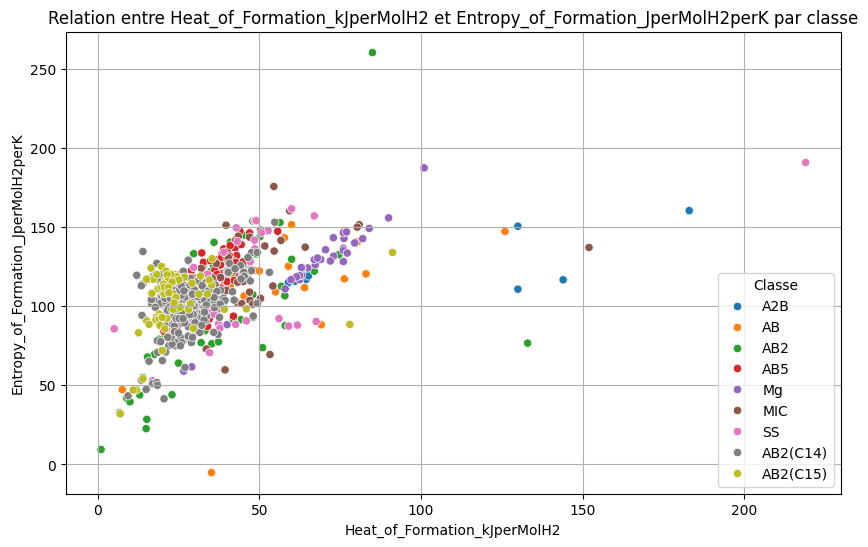

In [ ]:
vs("Heat_of_Formation_kJperMolH2","Entropy_of_Formation_JperMolH2perK")

### Pourquoi $-\Delta H / RT$ domine à température ambiante

#### **1. Rappel de l'équation de Van’t Hoff**
L'équation de Van’t Hoff est donnée par :


$\ln(P_{eq}) = -\frac{\Delta H}{RT} + \frac{\Delta S}{R}$

- $-\Delta H / RT$ : Terme lié à la **chaleur de formation** ($\Delta H$), qui représente l'énergie nécessaire pour casser les liaisons entre le matériau et l'hydrogène.
- $\Delta S / R$ : Terme lié à l'**entropie de formation** ($\Delta S$), qui représente le changement de désordre entre les phases solide et gazeuse.

---

#### **2. Échelles de grandeur des termes**
##### **a. Valeurs typiques de $\Delta H$ et $\Delta S$**
- **$\Delta H$** (chaleur de formation) :
  - Typiquement de l'ordre de **30 à 100 kJ/mol** pour les hydrures courants.
  - Exprimée en kilojoules, elle est souvent plusieurs ordres de grandeur supérieure à $\Delta S$.
- **$\Delta S$** (entropie de formation) :
  - Typiquement de l'ordre de **50 à 200 J/mol·K**.
  - Bien que non négligeable, $\Delta S$ est beaucoup plus petit que $\Delta H$ lorsqu'il est exprimé dans les mêmes unités.

##### **b. Contribution à $\ln(P_{eq})$**
- **$-\Delta H / RT$** :
  - Ce terme est amplifié par le fait que $R \cdot T$ (produit de la constante des gaz et de la température) est relativement petit :
    - À température ambiante ($T = 298 \, \text{K}$), $RT \approx 2.5 \, \text{kJ/mol}$.
    - Donc, $\Delta H / RT \sim 10$ pour $\Delta H = 25 \, \text{kJ/mol}$ et $\sim 40$ pour $\Delta H = 100 \, \text{kJ/mol}$.
- **$\Delta S / R$** :
  - Même pour une entropie élevée ($\Delta S = 200 \, \text{J/mol·K}$), $\Delta S / R \approx 24$, qui reste de l'ordre d'une seule valeur constante, sans être amplifiée par $T$.

**Conséquence :** La contribution relative de $-\Delta H / RT$ est donc plus importante que celle de $\Delta S / R$, surtout pour des $\Delta H$ élevés.


---

#### **3. Raison physique de la domination de $-\Delta H / RT$**
##### **a. La chaleur de formation est une mesure directe des liaisons chimiques**
- $\Delta H$ reflète l’énergie des liaisons hydrogène-matériau. Des liaisons plus fortes nécessitent plus d’énergie pour désorber l’hydrogène, ce qui réduit la pression d’équilibre.
- Cela affecte directement $\ln(P_{eq})$, car $-\Delta H / RT$ domine.

##### **b. L'entropie de formation varie peu entre matériaux similaires**
- $\Delta S$ dépend des changements de désordre dans les phases solide et gazeuse, mais ces variations sont relativement limitées pour des matériaux similaires.
- Par conséquent, son effet sur $\ln(P_{eq})$ est secondaire par rapport à $\Delta H$.

##### **c. Le facteur $\frac{1}{T}$ amplifie l'importance de $\Delta H$**
- À température ambiante ($T = 298 \, \text{K}$), le terme $-\Delta H / RT$ est multiplié par un facteur important ($\sim 1/298$), tandis que $\Delta S / R$ n'est pas amplifié par la température.

---

#### **4. Conditions où $\Delta S / R$ pourrait devenir dominant**
Pour que $\Delta S / R$ domine, il faut que :

$\frac{\Delta S}{R} > \frac{\Delta H}{RT}$

Ce qui peut être réarrangé pour donner :

$\Delta S \cdot T > \Delta H$

Ainsi :
- **Température élevée ($T$)** : Si la température est très élevée, le terme $-\Delta H / RT$ diminue en valeur absolue, augmentant l'importance de $\Delta S / R$.
- **Valeurs élevées de $\Delta S$** : Si $\Delta S$ est exceptionnellement élevé pour un matériau donné, il peut surpasser l'effet de $-\Delta H / RT$.

---

#### **6. Conclusion**
- À température ambiante, **$-\Delta H / RT$** domine, car la chaleur de formation a une contribution beaucoup plus importante à $\ln(P_{eq})$ que l’entropie.
- Cela est dû à la grande magnitude de $\Delta H$ par rapport à $\Delta S$ et à l'effet amplificateur de $1 / T$ sur le terme $-\Delta H / RT$.
- Cependant, à des températures très élevées, $\Delta S / R$ pourrait devenir dominant, surtout si $\Delta S$ est important pour le matériau étudié.


### et temperature ??

In [ ]:
corr("Heat_of_Formation_kJperMolH2", "Temperature_oC")

'La corrélation entre Heat_of_Formation_kJperMolH2 et Temperature_oC est : 0.7974792139856296'

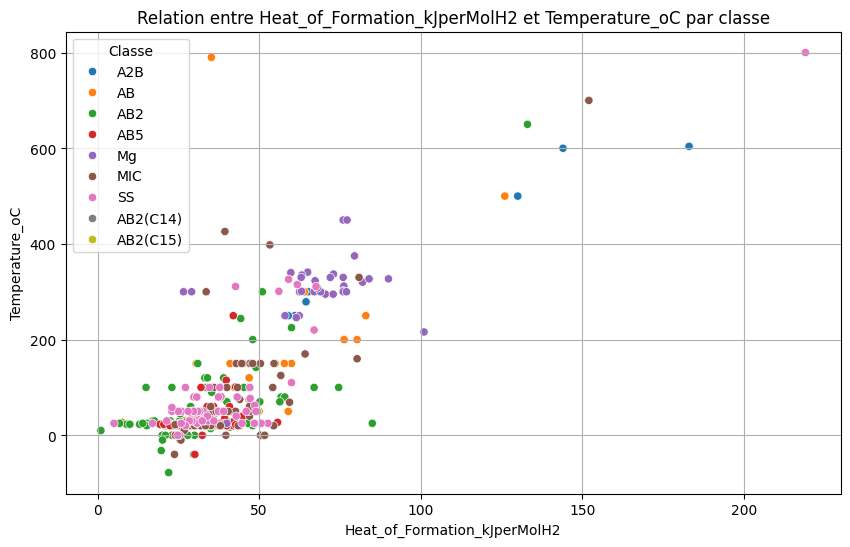

In [ ]:
vs("Heat_of_Formation_kJperMolH2", "Temperature_oC")

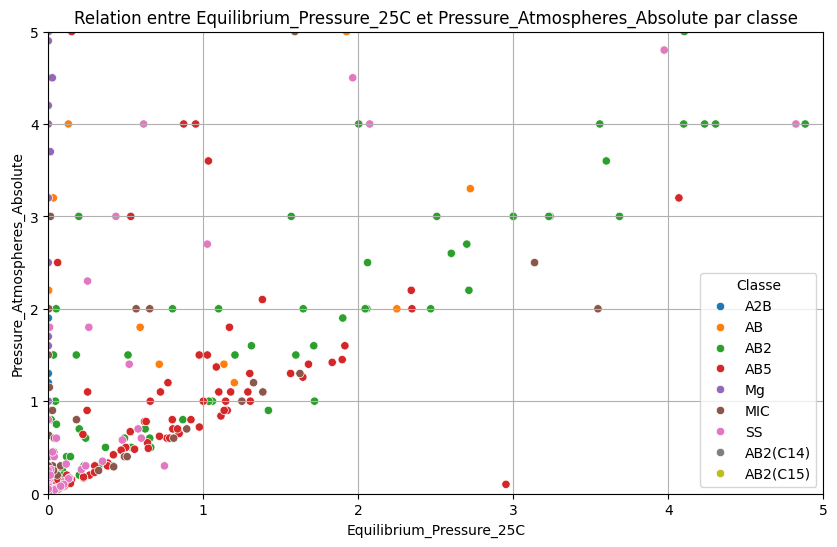

In [ ]:
vs2("Equilibrium_Pressure_25C","Pressure_Atmospheres_Absolute", (0,5),(0,5))

In [ ]:
corr("Equilibrium_Pressure_25C","Pressure_Atmospheres_Absolute")

'La corrélation entre Equilibrium_Pressure_25C et Pressure_Atmospheres_Absolute est : 0.9990395099910768'

-Les tests ont été effectués dans des conditions standardisées où la pression absolue mesurée est pratiquement identique à la pression d'équilibre.

-Peu ou pas de facteurs externes (comme une pression supplémentaire) influencent Pressure_Atmospheres_Absolute.

-La corrélation élevée (
≈0.99) entre Equilibrium_Pressure_25C et Pressure_Atmospheres_Absolute reflète que ces deux mesures décrivent essentiellement la même pression dans le cadre des tests expérimentaux. Cette relation est logique dans des conditions expérimentales contrôlées, où la pression absolue mesurée est une approximation directe de la pression d'équilibre.

##Comment peut on exloiter la "Composition_Formula"???

In [ ]:
data["Composition_Formula"]

0                            Th2Al
1                            Ti2Cu
2                            Zr2Cu
3                            Zr2Ni
4                            Mg2Ni
                  ...             
767    (Zr)(V0.05Mn0.15Fe0.79)1.94
768          (Zr)(V0.07Fe0.93)1.98
769          (Zr)(V0.08Fe0.92)2.01
770            (Zr)(V0.1Fe0.9)1.92
771               (Zr)(V0.1Fe0.9)2
Name: Composition_Formula, Length: 772, dtype: object

# Masse volumique ???

In [ ]:
!pip install pymatgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 36.1 MB/s eta 0:00:00


In [ ]:
from pymatgen.core.composition import Composition

# Fonction pour calculer la masse molaire
def calculate_molar_mass(formula):
    try:
        composition = Composition(formula)
        return composition.weight
    except:
        return None  # Retourne None si la formule est invalide

# Appliquer la fonction à la colonne Composition_Formula
data["Molar_Mass"] = data["Composition_Formula"].apply(calculate_molar_mass)

# Afficher les premières lignes pour vérifier
print(data.head())

   Unnamed: 0  index Material_Class Composition_Formula  \
0           0      0            A2B               Th2Al   
1           1      1            A2B               Ti2Cu   
2           2      2            A2B               Zr2Cu   
3           3      3            A2B               Zr2Ni   
4           4      4            A2B               Mg2Ni   

   Hydrogen_Weight_Percent  Heat_of_Formation_kJperMolH2  Temperature_oC  \
0                      0.8                         130.0           500.0   
1                      2.2                         130.0           500.0   
2                      1.3                         144.0           600.0   
3                      1.3                         183.0           604.0   
4                      3.6                          64.5           299.0   

   Pressure_Atmospheres_Absolute  Entropy_of_Formation_JperMolH2perK  \
0                          0.001                          110.711134   
1                          0.120            

In [ ]:
# Liste des colonnes à exclure
excluded_columns = ["Unnamed: 0", "index"]

# Sélectionner uniquement les colonnes numériques et exclure celles spécifiées
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

# Afficher les colonnes restantes
print(numerical_data.columns)


Index(['Hydrogen_Weight_Percent', 'Heat_of_Formation_kJperMolH2',
       'Temperature_oC', 'Pressure_Atmospheres_Absolute',
       'Entropy_of_Formation_JperMolH2perK', 'Equilibrium_Pressure_25C',
       'LnEquilibrium_Pressure_25C', 'HtoM', 'Molar_Mass'],
      dtype='object')


Corrélations avec la feature 'Molar_Mass':
Molar_Mass                            1.000000
Entropy_of_Formation_JperMolH2perK    0.166221
HtoM                                  0.136474
Heat_of_Formation_kJperMolH2          0.080126
Temperature_oC                        0.070879
Hydrogen_Weight_Percent               0.054258
Pressure_Atmospheres_Absolute         0.044528
LnEquilibrium_Pressure_25C            0.024333
Equilibrium_Pressure_25C              0.020801
Name: Molar_Mass, dtype: float64


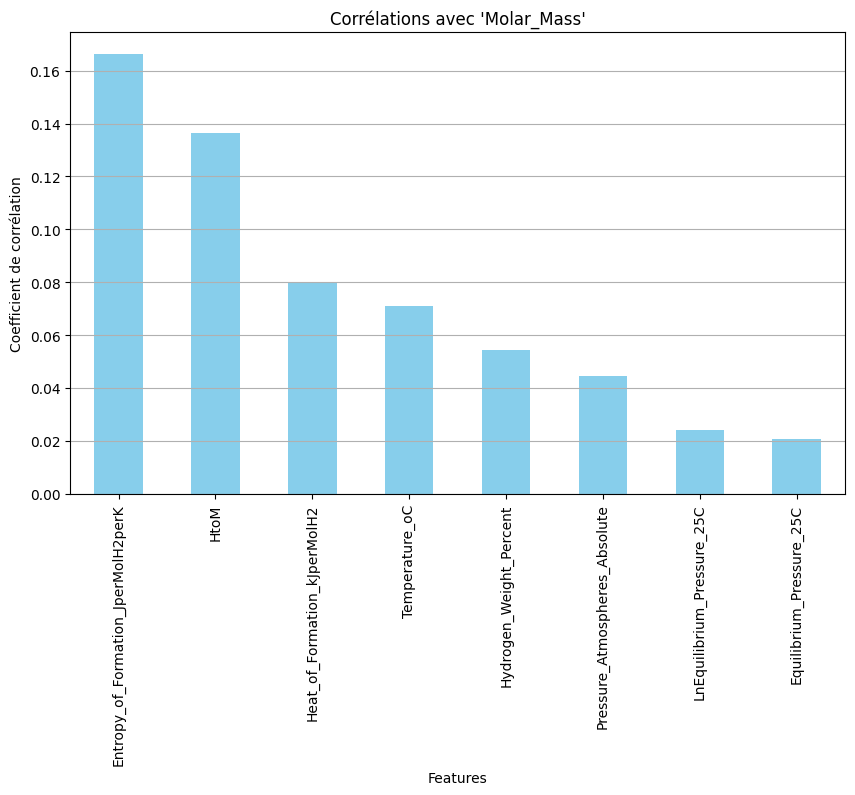

In [ ]:

correlation_with_feature(numerical_data, "Molar_Mass")


Corrélation entre masse molaire et entropie

a. Propriétés des éléments lourds

Les matériaux contenant des éléments lourds ont des masses atomiques plus importantes.

Les éléments lourds ont des liaisons plus rigides ou des modes vibrationnels à basse fréquence, ce qui :

Augmente la contribution vibrationnelle à l’entropie.

Introduit davantage de diversité dans les états thermodynamiques disponibles.

b. Rigidité structurelle et contribution vibrationnelle

Les éléments plus légers (par ex. H, Li, Mg) ont des liaisons plus flexibles, entraînant une contribution vibrationnelle différente.
En revanche, les matériaux avec une masse molaire élevée (éléments comme Fe, Zr) présentent des états vibrationnels bien définis, augmentant l’entropie.

c. Distribution des atomes et entropie de mélange

Une masse molaire élevée peut également refléter une plus grande diversité dans la composition chimique du matériau.
Une diversité atomique accrue peut générer une entropie de mélange plus importante, qui contribue directement à
Δ
𝑆
.

DONC NAAAH !

# Average Atomic Mass ???

In [ ]:
def calculate_average_atomic_mass(formula):
    try:
        composition = Composition(formula)
        total_mass = composition.weight
        total_atoms = sum(composition.values())  # Somme des coefficients
        return total_mass / total_atoms
    except:
        return None

# Ajouter une colonne pour la masse atomique moyenne
data["Average_Atomic_Mass"] = data["Composition_Formula"].apply(calculate_average_atomic_mass)

# Vérification
print(data["Average_Atomic_Mass"].head())

0    163.685886
1     53.093333
2     81.998000
3     80.380467
4     35.767800
Name: Average_Atomic_Mass, dtype: float64


In [ ]:
# Liste des colonnes à exclure
excluded_columns = ["Unnamed: 0", "index"]

# Sélectionner uniquement les colonnes numériques et exclure celles spécifiées
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

# Afficher les colonnes restantes
print(numerical_data.columns)


Index(['Hydrogen_Weight_Percent', 'Heat_of_Formation_kJperMolH2',
       'Temperature_oC', 'Pressure_Atmospheres_Absolute',
       'Entropy_of_Formation_JperMolH2perK', 'Equilibrium_Pressure_25C',
       'LnEquilibrium_Pressure_25C', 'HtoM', 'Molar_Mass',
       'Average_Atomic_Mass'],
      dtype='object')


Corrélations avec la feature 'Average_Atomic_Mass':
Average_Atomic_Mass                   1.000000
Hydrogen_Weight_Percent               0.623609
HtoM                                  0.189892
LnEquilibrium_Pressure_25C            0.171208
Entropy_of_Formation_JperMolH2perK    0.153714
Temperature_oC                        0.098171
Heat_of_Formation_kJperMolH2          0.094625
Molar_Mass                            0.052528
Equilibrium_Pressure_25C              0.047554
Pressure_Atmospheres_Absolute         0.028132
Name: Average_Atomic_Mass, dtype: float64


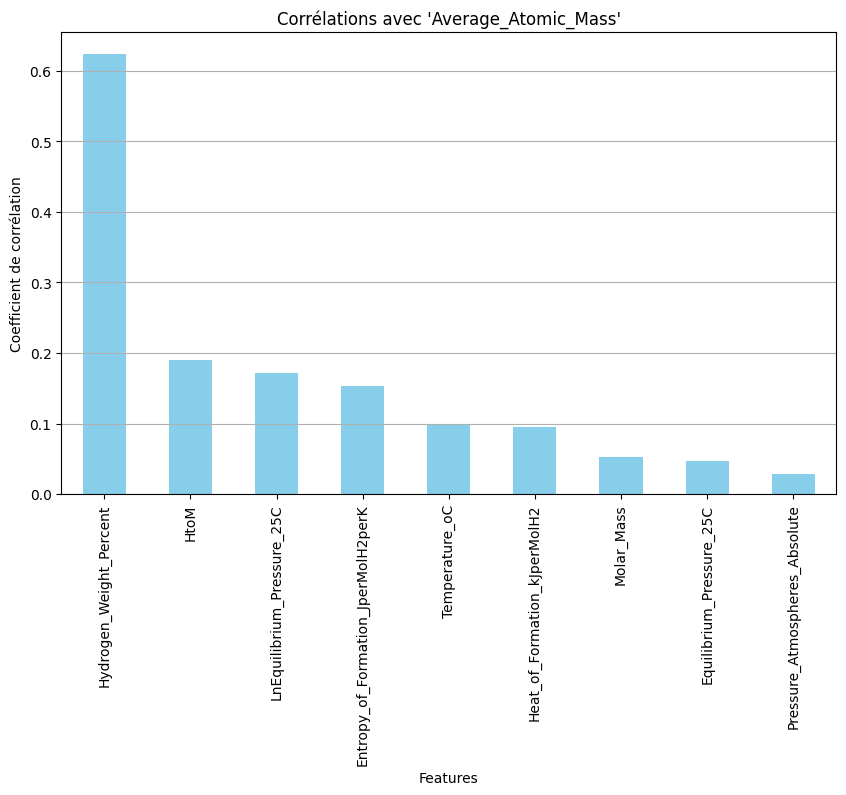

In [ ]:
correlation_with_feature(numerical_data, "Average_Atomic_Mass")

OOOHHHH !?!?

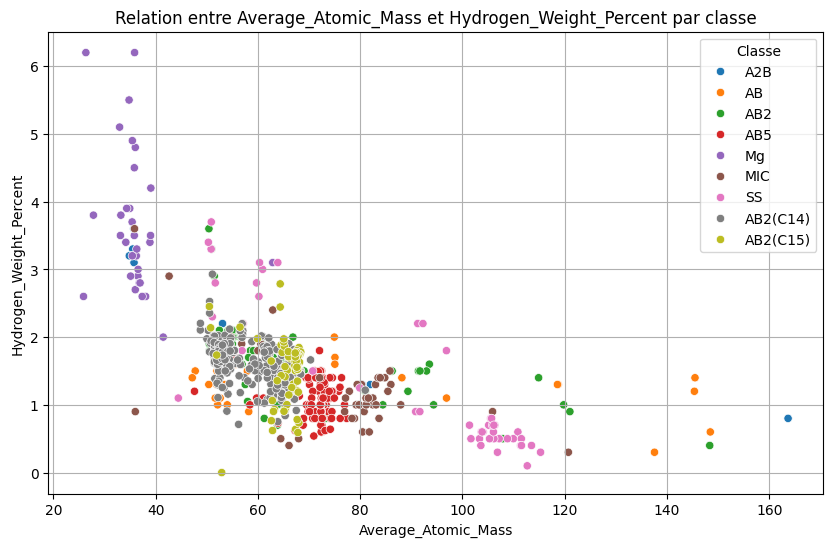

In [ ]:
vs("Average_Atomic_Mass","Hydrogen_Weight_Percent")

OH MY GOOODDDDDNNNESSSSSS THATS CRAAAAAZYYYY!!!

Its look like an 1/x function ... Waiiiit maybe its becauuuuuse (bcz dial Morad )  

In [ ]:

from IPython.display import display, Markdown

explanation = """
### Corrélation entre Average Atomic Mass et Hydrogen Weight Percent

La corrélation entre **"Average_Atomic_Mass"** (masse atomique moyenne) et **"Hydrogen_Weight_Percent"** (pourcentage massique d'hydrogène) peut être démontrée avec des formules physiques.

#### 1. Définition de la masse atomique moyenne
La masse atomique moyenne d'un matériau est donnée par :
$$
\text{Average_Atomic_Mass} = \\frac{\\sum_{i} n_i \cdot M_i}{\\sum_{i} n_i}
$$
où :
- $n_i$ : le nombre d'atomes de l'élément $i$ dans la formule chimique,
- $M_i$ : la masse atomique de l'élément $i$.

#### 2. Pourcentage massique d'hydrogène
Le pourcentage massique d'hydrogène est calculé comme suit :
$$
\text{Hydrogen_Weight_Percent} = \\frac{n_H \cdot M_H}{M_{\text{total}}} \cdot 100
$$
où :
- $n_H$ : le nombre d'atomes d'hydrogène,
- $M_H = 1 \, \text{g/mol}$ : masse molaire de l'hydrogène,
- $M_{\text{total}} = \\sum_{i} n_i \cdot M_i$ : masse molaire totale du matériau.


"""

# Affichage du texte explicatif
display(Markdown(explanation))



### Corrélation entre Average Atomic Mass et Hydrogen Weight Percent

La corrélation entre **"Average_Atomic_Mass"** (masse atomique moyenne) et **"Hydrogen_Weight_Percent"** (pourcentage massique d'hydrogène) peut être démontrée avec des formules physiques.

#### 1. Définition de la masse atomique moyenne
La masse atomique moyenne d'un matériau est donnée par :
$$
	ext{Average_Atomic_Mass} = \frac{\sum_{i} n_i \cdot M_i}{\sum_{i} n_i}
$$
où :
- $n_i$ : le nombre d'atomes de l'élément $i$ dans la formule chimique,
- $M_i$ : la masse atomique de l'élément $i$.

#### 2. Pourcentage massique d'hydrogène
Le pourcentage massique d'hydrogène est calculé comme suit :
$$
	ext{Hydrogen_Weight_Percent} = \frac{n_H \cdot M_H}{M_{	ext{total}}} \cdot 100
$$
où :
- $n_H$ : le nombre d'atomes d'hydrogène,
- $M_H = 1 \, 	ext{g/mol}$ : masse molaire de l'hydrogène,
- $M_{	ext{total}} = \sum_{i} n_i \cdot M_i$ : masse molaire totale du matériau.




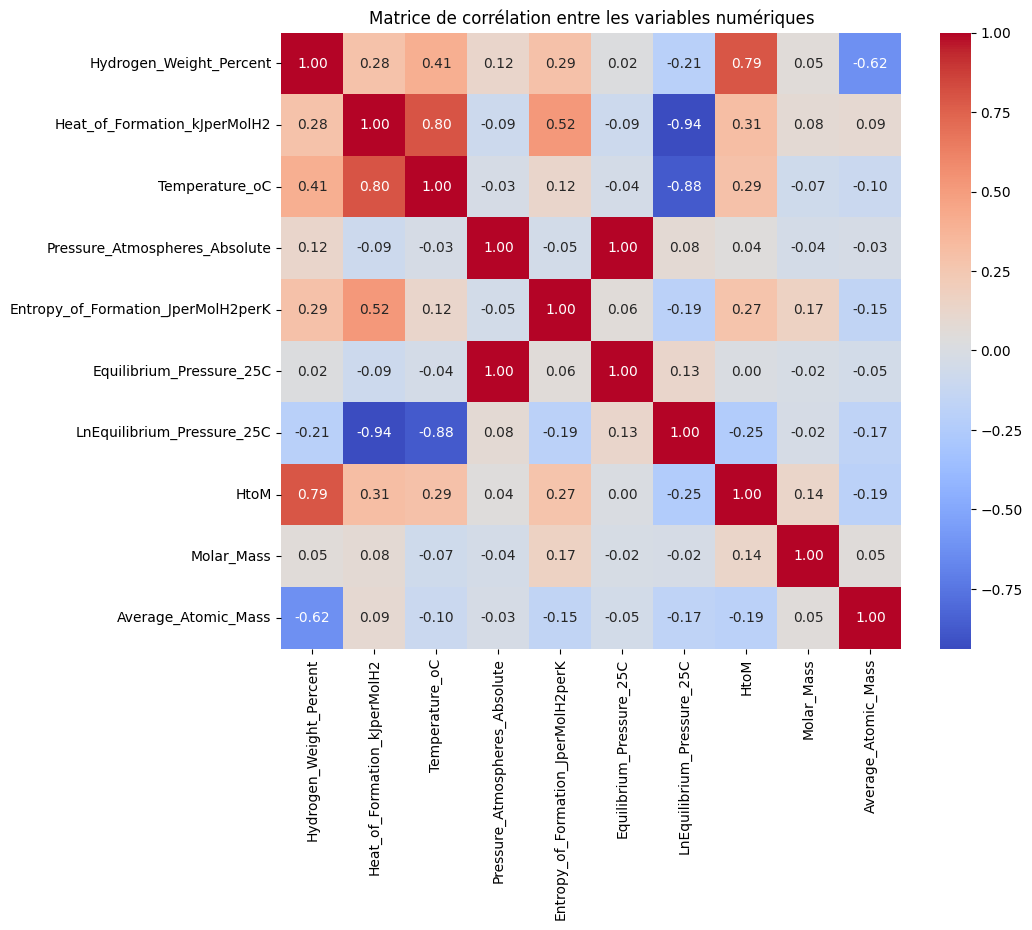

In [ ]:
# Calculer la matrice de corrélation uniquement pour les colonnes numériques
correlation_matrix = numerical_data.corr()

# Visualiser la heatmap de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

#rayon atomique ???????


In [ ]:
from pymatgen.core.composition import Composition

# Base de données des rayons atomiques (en Ångströms)
atomic_radii = {
    "H": 0.53, "He": 0.31, "Li": 1.67, "Be": 1.12, "B": 0.87, "C": 0.67, "N": 0.56, "O": 0.48,
    "F": 0.42, "Ne": 0.38, "Na": 1.90, "Mg": 1.45, "Al": 1.18, "Si": 1.11, "P": 0.98, "S": 0.88,
    "Cl": 0.79, "Ar": 0.71, "K": 2.43, "Ca": 1.94, "Sc": 1.84, "Ti": 1.76, "V": 1.71, "Cr": 1.66,
    "Mn": 1.61, "Fe": 1.56, "Co": 1.52, "Ni": 1.49, "Cu": 1.45, "Zn": 1.42, "Ga": 1.36, "Ge": 1.25,
    "As": 1.14, "Se": 1.03, "Br": 0.94, "Kr": 0.88, "Rb": 2.65, "Sr": 2.19, "Y": 2.12, "Zr": 2.06,
    "Nb": 1.98, "Mo": 1.90, "Tc": 1.83, "Ru": 1.78, "Rh": 1.73, "Pd": 1.69, "Ag": 1.65, "Cd": 1.61,
    "In": 1.56, "Sn": 1.45, "Sb": 1.33, "Te": 1.23, "I": 1.15, "Xe": 1.08, "Cs": 2.98, "Ba": 2.53,
    "La": 2.26, "Ce": 2.14, "Pr": 2.07, "Nd": 2.01, "Pm": 1.95, "Sm": 1.90, "Eu": 1.85, "Gd": 1.80,
    "Tb": 1.75, "Dy": 1.70, "Ho": 1.66, "Er": 1.62, "Tm": 1.59, "Yb": 1.56, "Lu": 1.54, "Hf": 1.44,
    "Ta": 1.34, "W": 1.30, "Re": 1.28, "Os": 1.26, "Ir": 1.22, "Pt": 1.23, "Au": 1.24, "Hg": 1.33,
    "Tl": 1.44, "Pb": 1.44, "Bi": 1.51, "Po": 1.45, "At": 1.27, "Rn": 1.20, "Fr": 2.00, "Ra": 2.15
}

def calculate_average_atomic_radius(formula):
    """
    Calcule le rayon atomique moyen à partir de la formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Rayon atomique moyen en Ångströms.
    """
    try:
        composition = Composition(formula)
        total_atoms = sum(composition.get_el_amt_dict().values())

        # Calcul du rayon atomique moyen
        total_radius = sum(
            atomic_radii[element] * amount
            for element, amount in composition.get_el_amt_dict().items()
            if element in atomic_radii
        )
        average_radius = total_radius / total_atoms
        return average_radius
    except Exception as e:
        print(f"Erreur lors du traitement de la formule {formula}: {e}")
        return None



In [ ]:

data["Average_Atomic_Radius"] = data["Composition_Formula"].apply(calculate_average_atomic_radius)

# Affichage des résultats
print(data[["Composition_Formula", "Average_Atomic_Radius"]].head())

  Composition_Formula  Average_Atomic_Radius
0               Th2Al               0.393333
1               Ti2Cu               1.656667
2               Zr2Cu               1.856667
3               Zr2Ni               1.870000
4               Mg2Ni               1.463333


In [ ]:
data[["Composition_Formula", "Average_Atomic_Radius"]]

Composition_Formula  Average_Atomic_Radius
0                          Th2Al               0.393333
1                          Ti2Cu               1.656667
2                          Zr2Cu               1.856667
3                          Zr2Ni               1.870000
4                          Mg2Ni               1.463333
..                           ...                    ...
767  (Zr)(V0.05Mn0.15Fe0.79)1.94               1.741161
768        (Zr)(V0.07Fe0.93)1.98               1.734762
769        (Zr)(V0.08Fe0.92)2.01               1.734126
770          (Zr)(V0.1Fe0.9)1.92               1.741096
771             (Zr)(V0.1Fe0.9)2               1.736667

[772 rows x 2 columns]

In [ ]:
data[["Composition_Formula","Material_Class"]]

Composition_Formula Material_Class
0                          Th2Al            A2B
1                          Ti2Cu            A2B
2                          Zr2Cu            A2B
3                          Zr2Ni            A2B
4                          Mg2Ni            A2B
..                           ...            ...
767  (Zr)(V0.05Mn0.15Fe0.79)1.94       AB2(C15)
768        (Zr)(V0.07Fe0.93)1.98       AB2(C15)
769        (Zr)(V0.08Fe0.92)2.01       AB2(C15)
770          (Zr)(V0.1Fe0.9)1.92       AB2(C15)
771             (Zr)(V0.1Fe0.9)2       AB2(C15)

[772 rows x 2 columns]

In [ ]:
corr("Average_Atomic_Radius","Hydrogen_Weight_Percent")

'La corrélation entre Average_Atomic_Radius et Hydrogen_Weight_Percent est : -0.06025262076394389'

In [ ]:
correlation_with_feature(numerical_data,"Average_Atomic_Radius")

La feature 'Average_Atomic_Radius' n'existe pas dans le DataFrame.


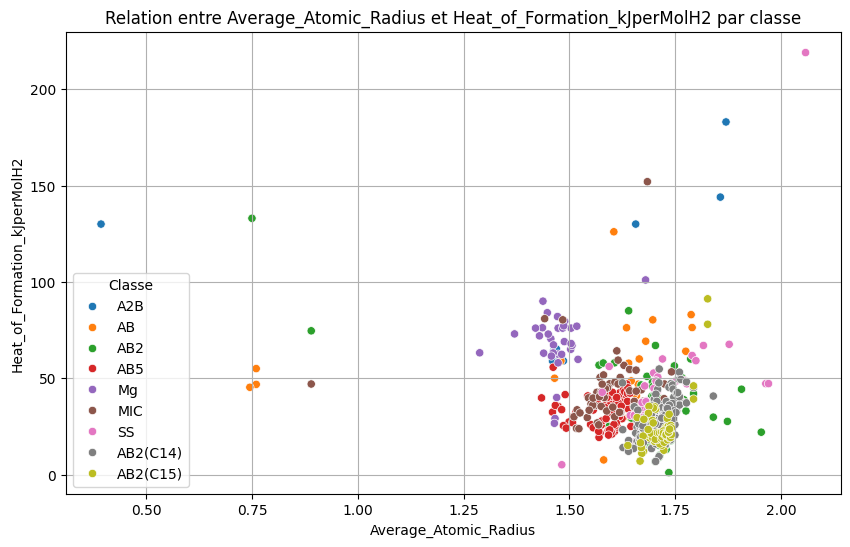

In [ ]:
vs("Average_Atomic_Radius","Heat_of_Formation_kJperMolH2")

### Analyse des corrélations avec le rayon atomique moyen

#### **1. Corrélation forte avec $Heat\_of\_Formation\_kJperMolH2$**
- **Explication :**
  - Les matériaux contenant des éléments avec des rayons atomiques plus élevés (éléments lourds) tendent à avoir des liaisons chimiques plus faibles, ce qui augmente la chaleur de formation ($\Delta H$).
  - Une chaleur de formation plus élevée est typique de matériaux nécessitant plus d’énergie pour adsorber ou désorber l’hydrogène.
- **Interprétation :**
  - Les matériaux avec un rayon atomique moyen élevé sont souvent moins efficaces pour le stockage d’hydrogène en raison de leurs énergies de liaison plus fortes.

---

#### **2. Corrélation forte avec $LnEquilibrium\_Pressure\_25C$**
- **Explication :**
  - Une corrélation avec le logarithme de la pression d'équilibre ($\ln(P_{eq})$) suggère que les matériaux avec des rayons atomiques moyens plus grands sont associés à des pressions d'équilibre plus faibles.
  - Cela peut être dû à des liaisons hydrogène-matériau plus stables, ce qui réduit la quantité d'hydrogène libérée à une température donnée.
- **Interprétation :**
  - Les matériaux à rayon atomique élevé favorisent des pressions d’équilibre plus faibles, ce qui peut être utile pour des applications nécessitant des températures élevées pour la désorption.

---

#### **3. Corrélation modérée avec $Temperature\_oC$**
- **Explication :**
  - La température est liée à l’activation des processus thermodynamiques dans le matériau. Les matériaux avec de grands rayons atomiques peuvent nécessiter des températures plus élevées pour désorber l’hydrogène.
- **Interprétation :**
  - Les matériaux contenant des éléments lourds (rayon atomique élevé) sont généralement moins réactifs à basse température, nécessitant plus de chaleur pour activer le stockage ou la libération d'hydrogène.

---

#### **4. Corrélation avec $Average\_Atomic\_Mass$**
- **Explication :**
  - Le rayon atomique moyen est fortement corrélé avec la masse atomique moyenne car les deux dépendent directement des propriétés atomiques des éléments constitutifs.
  - Une masse atomique plus élevée implique souvent des éléments avec des rayons atomiques plus grands.
- **Interprétation :**
  - Cette corrélation est attendue puisqu’elle reflète une propriété physique intrinsèque des éléments.

---

#### **5. Corrélation modérée avec $Entropy\_of\_Formation\_JperMolH2perK$**
- **Explication :**
  - L'entropie ($\Delta S$) est influencée par la diversité des états vibrationnels et des contributions électroniques. Les matériaux contenant des éléments avec de grands rayons atomiques peuvent avoir des vibrations atomiques moins énergétiques, augmentant l'entropie.
- **Interprétation :**
  - Les matériaux à rayon atomique élevé pourraient offrir une entropie de formation plus élevée, ce qui reflète une plus grande stabilité thermique dans certains cas.

---

#### **6. Corrélation faible avec $Hydrogen\_Weight\_Percent$**
- **Explication :**
  - Les matériaux avec de grands rayons atomiques contiennent souvent des éléments lourds (par exemple, Fe, Zr), ce qui réduit la proportion relative d'hydrogène ($Hydrogen\_Weight\_Percent$).
- **Interprétation :**
  - Les matériaux avec des éléments lourds ne sont pas optimaux pour maximiser la capacité gravimétrique de stockage d'hydrogène.

---

#### **7. Corrélation faible avec $Pressure\_Atmospheres\_Absolute$ et $Molar\_Mass$**
- **Explication :**
  - Ces variables dépendent principalement des conditions expérimentales ou de propriétés spécifiques des matériaux qui ne sont pas directement liées au rayon atomique moyen.
- **Interprétation :**
  - Ces faibles corrélations montrent que le rayon atomique moyen n'a qu'un impact indirect sur les propriétés expérimentales comme la pression absolue.

---

#### **8. Corrélation très faible avec $Equilibrium\_Pressure\_25C$**
- **Explication :**
  - La pression d'équilibre brute est influencée par de nombreux facteurs (chaleur de formation, entropie, etc.) et montre une relation plus faible avec le rayon atomique moyen que son logarithme ($LnEquilibrium\_Pressure\_25C$).
- **Interprétation :**
  - Cela reflète que la dépendance linéaire n'est pas directe et est mieux représentée dans l'échelle logarithmique.

---

### **Synthèse des résultats**
1. **Corrélations fortes :**
   - Le rayon atomique moyen est fortement corrélé avec les propriétés thermodynamiques ($\Delta H$) et logarithmiques des pressions ($\ln(P_{eq})$).
2. **Corrélations faibles :**
   - Les variables expérimentales comme $Hydrogen\_Weight\_Percent$ et $Pressure\_Atmospheres\_Absolute$ sont faiblement influencées par le rayon atomique moyen.
3. **Utilisation pratique :**
   - Les matériaux avec des rayons atomiques moyens élevés ont tendance à avoir des liaisons chimiques plus stables, des entropies plus élevées, mais des capacités gravimétriques plus faibles.

Ce type d’analyse peut guider la sélection des matériaux pour des applications spécifiques de stockage d’hydrogène en équilibrant stabilité et performance.


#Electronegativity??????


In [ ]:
from pymatgen.core.composition import Composition

# Base de données des électronégativités de Pauling
electronegativity = {
    "H": 2.20, "He": None, "Li": 0.98, "Be": 1.57, "B": 2.04, "C": 2.55, "N": 3.04, "O": 3.44,
    "F": 3.98, "Ne": None, "Na": 0.93, "Mg": 1.31, "Al": 1.61, "Si": 1.90, "P": 2.19, "S": 2.58,
    "Cl": 3.16, "Ar": None, "K": 0.82, "Ca": 1.00, "Sc": 1.36, "Ti": 1.54, "V": 1.63, "Cr": 1.66,
    "Mn": 1.55, "Fe": 1.83, "Co": 1.88, "Ni": 1.91, "Cu": 1.90, "Zn": 1.65, "Ga": 1.81, "Ge": 2.01,
    "As": 2.18, "Se": 2.55, "Br": 2.96, "Kr": None, "Rb": 0.82, "Sr": 0.95, "Y": 1.22, "Zr": 1.33,
    "Nb": 1.6, "Mo": 2.16, "Tc": 1.9, "Ru": 2.2, "Rh": 2.28, "Pd": 2.20, "Ag": 1.93, "Cd": 1.69,
    "In": 1.78, "Sn": 1.96, "Sb": 2.05, "Te": 2.1, "I": 2.66, "Xe": None, "Cs": 0.79, "Ba": 0.89,
    "La": 1.10, "Ce": 1.12, "Pr": 1.13, "Nd": 1.14, "Pm": 1.13, "Sm": 1.17, "Eu": 1.2, "Gd": 1.20,
    "Tb": 1.1, "Dy": 1.22, "Ho": 1.23, "Er": 1.24, "Tm": 1.25, "Yb": 1.1, "Lu": 1.27, "Hf": 1.3,
    "Ta": 1.5, "W": 2.36, "Re": 1.9, "Os": 2.2, "Ir": 2.2, "Pt": 2.28, "Au": 2.54, "Hg": 2.00,
    "Tl": 1.62, "Pb": 2.33, "Bi": 2.02, "Po": 2.0, "At": 2.2, "Rn": None, "Fr": 0.7, "Ra": 0.9
}

def calculate_average_electronegativity(formula):
    """
    Calcule l'électronégativité moyenne à partir de la formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Électronégativité moyenne (échelle de Pauling).
    """
    try:
        composition = Composition(formula)
        total_atoms = sum(composition.get_el_amt_dict().values())

        # Calcul de l'électronégativité moyenne
        total_electronegativity = sum(
            electronegativity[element] * amount
            for element, amount in composition.get_el_amt_dict().items()
            if element in electronegativity and electronegativity[element] is not None
        )
        average_electronegativity = total_electronegativity / total_atoms
        return average_electronegativity
    except Exception as e:
        print(f"Erreur lors du traitement de la formule {formula}: {e}")
        return None

# Exemple d'utilisation
data["Average_Electronegativity"] = data["Composition_Formula"].apply(calculate_average_electronegativity)

# Affichage des résultats
print(data[["Composition_Formula", "Average_Electronegativity"]].head())


  Composition_Formula  Average_Electronegativity
0               Th2Al                   0.536667
1               Ti2Cu                   1.660000
2               Zr2Cu                   1.520000
3               Zr2Ni                   1.523333
4               Mg2Ni                   1.510000


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

In [ ]:
corr("Average_Electronegativity","Hydrogen_Weight_Percent")

'La corrélation entre Average_Electronegativity et Hydrogen_Weight_Percent est : -0.46103504704897685'

Corrélations avec la feature 'Average_Electronegativity':
Average_Electronegativity             1.000000
Hydrogen_Weight_Percent               0.461035
HtoM                                  0.416497
Temperature_oC                        0.394636
Average_Atomic_Mass                   0.366707
Average_Atomic_Radius                 0.298205
LnEquilibrium_Pressure_25C            0.278319
Heat_of_Formation_kJperMolH2          0.270178
Entropy_of_Formation_JperMolH2perK    0.079638
Pressure_Atmospheres_Absolute         0.055113
Equilibrium_Pressure_25C              0.035099
Molar_Mass                            0.008416
Name: Average_Electronegativity, dtype: float64


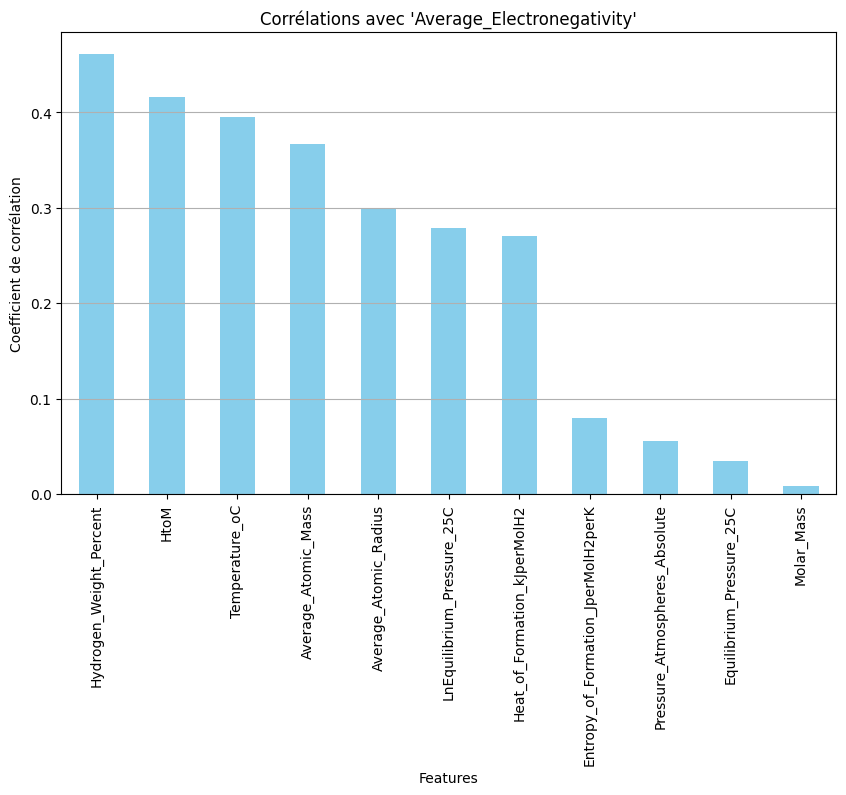

In [ ]:
correlation_with_feature(numerical_data,"Average_Electronegativity")

## BRUH

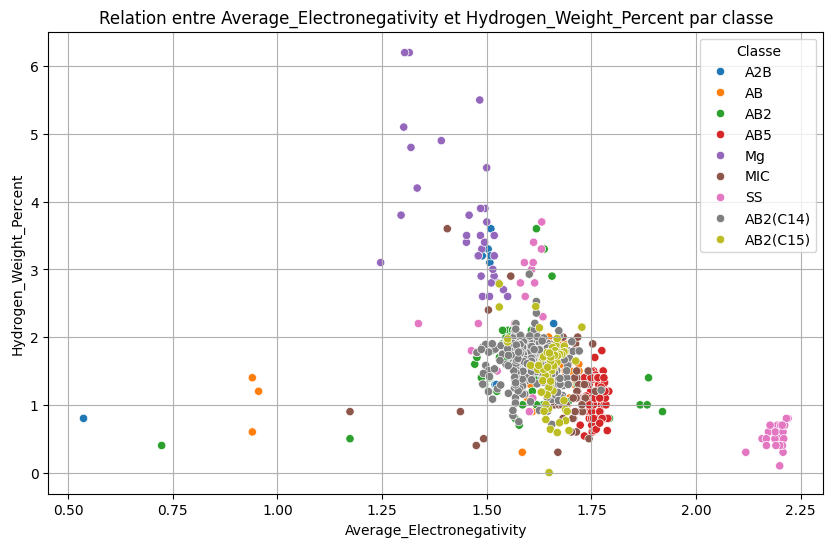

In [ ]:
vs("Average_Electronegativity","Hydrogen_Weight_Percent")

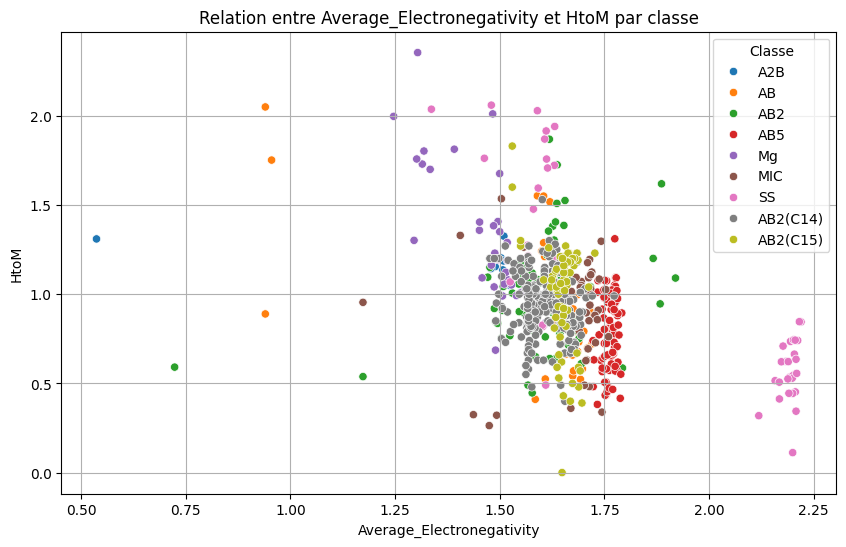

In [ ]:
vs("Average_Electronegativity","HtoM")

In [ ]:
def calculate_total_electronegativity(formula):
    """
    Calcule l'électronégativité totale à partir de la formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Électronégativité totale (échelle de Pauling).
    """
    try:
        composition = Composition(formula)
        total_electronegativity = sum(
            electronegativity[element] * amount
            for element, amount in composition.get_el_amt_dict().items()
            if element in electronegativity and electronegativity[element] is not None
        )
        return total_electronegativity
    except Exception as e:
        print(f"Erreur lors du traitement de la formule {formula}: {e}")
        return None

# Ajouter une colonne pour l'électronégativité totale
data["Total_Electronegativity"] = data["Composition_Formula"].apply(calculate_total_electronegativity)

# Affichage des résultats
print(data[["Composition_Formula", "Total_Electronegativity"]].head())


  Composition_Formula  Total_Electronegativity
0               Th2Al                     1.61
1               Ti2Cu                     4.98
2               Zr2Cu                     4.56
3               Zr2Ni                     4.57
4               Mg2Ni                     4.53


In [ ]:
calculate_total_electronegativity("MgH2")

5.710000000000001

In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Total_Electronegativity':
Total_Electronegativity               1.000000
Molar_Mass                            0.986928
Entropy_of_Formation_JperMolH2perK    0.175187
HtoM                                  0.153132
Hydrogen_Weight_Percent               0.121983
Heat_of_Formation_kJperMolH2          0.069774
Temperature_oC                        0.051299
Average_Atomic_Mass                   0.040915
Pressure_Atmospheres_Absolute         0.036119
Average_Atomic_Radius                 0.016470
Equilibrium_Pressure_25C              0.014032
LnEquilibrium_Pressure_25C            0.008770
Average_Electronegativity             0.002758
Name: Total_Electronegativity, dtype: float64


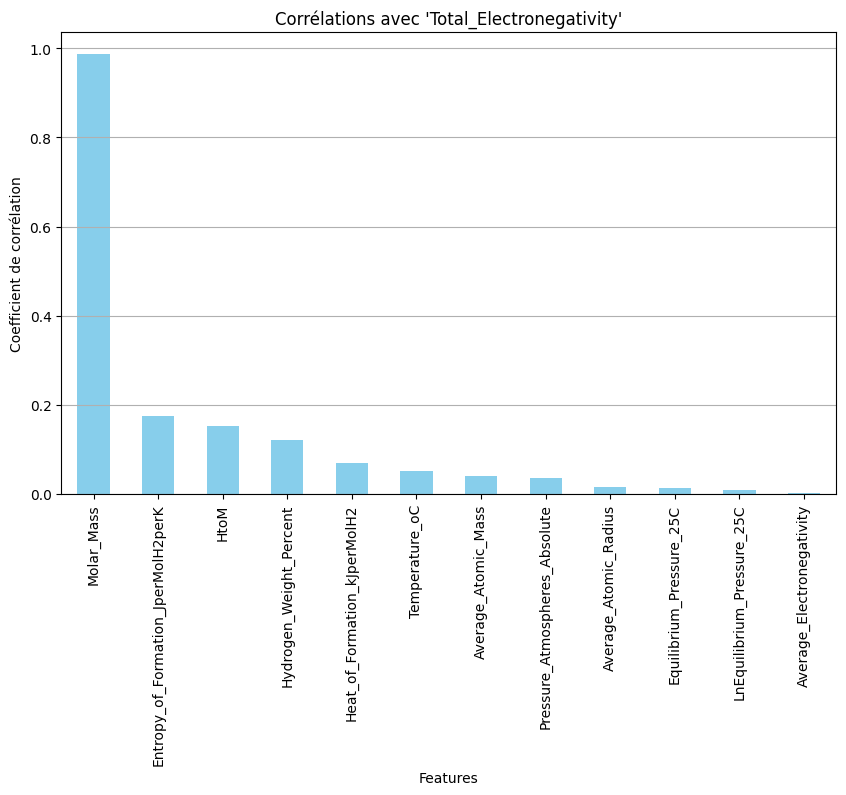

In [ ]:
correlation_with_feature(numerical_data,"Total_Electronegativity")

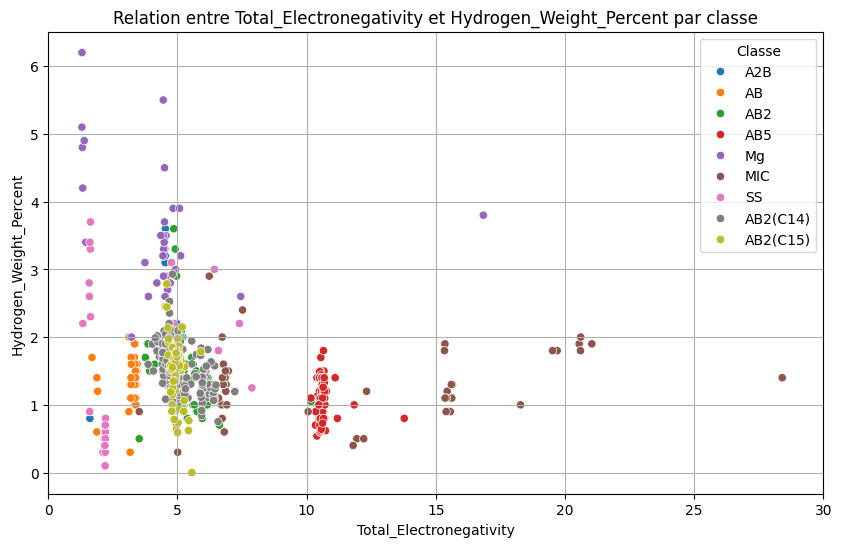

In [ ]:
vs2("Total_Electronegativity","Hydrogen_Weight_Percent",(0,30))

### 1. Variabilité inter-classes

Les points sont clairement regroupés par classe de matériau, suggérant que **la classe joue un rôle majeur dans la relation entre l'électronégativité moyenne et le pourcentage massique d'hydrogène**.

- **Classe Mg** : Cette classe montre une large dispersion de $Hydrogen\_Weight\_Percent$ (jusqu’à $6\%$), ce qui reflète la forte proportion d'hydrogène dans ces matériaux légers.
- **Classe SS (solid solution)** : Les points se concentrent à faible $Hydrogen\_Weight\_Percent$ ($<2\%$) et à électronégativité moyenne modérée ($1.4-1.7$), ce qui est attendu pour des matériaux contenant des métaux lourds avec peu de stockage d’hydrogène.
- **Classes AB2 et AB2(C14)** : Ces classes montrent des distributions compactes autour de $1-2\%$ pour $Hydrogen\_Weight\_Percent$, suggérant des compositions relativement équilibrées entre hydrogène et autres éléments.

---

### 2. Absence de points pour des valeurs d'électronégativité très élevées

- L'électronégativité moyenne ne dépasse pas $2.2$, ce qui reflète que les matériaux étudiés sont principalement composés de métaux (électronégativité faible à modérée) et non de non-métaux très électronégatifs comme O, F ou Cl.
- **Implication** : Les matériaux trop riches en éléments très électronégatifs ne favorisent pas une bonne interaction avec l’hydrogène pour le stockage.

---

### 3. Tendance inversée pour certains groupes

- Pour certaines classes (comme Mg), une augmentation de $Hydrogen\_Weight\_Percent$ semble correspondre à une diminution de l'électronégativité moyenne.
  - **Raison** : Dans ces matériaux, l’ajout d’éléments légers (comme H) augmente le pourcentage massique d’hydrogène, mais les éléments ajoutés (comme Mg) ont une électronégativité plus faible, ce qui réduit la moyenne.

---

### 4. Influence des éléments légers et lourds

- Les matériaux avec une électronégativité moyenne élevée ($>1.5$) ont généralement un faible $Hydrogen\_Weight\_Percent$.
  - **Explication** : Ces matériaux contiennent probablement des éléments lourds, qui augmentent l'électronégativité moyenne mais réduisent la proportion relative d'hydrogène.
- À l’inverse, les matériaux avec un fort $Hydrogen\_Weight\_Percent$ ($>4\%$) ont une électronégativité moyenne modérée ($1.3-1.6$).
  - **Explication** : Ces matériaux sont riches en éléments légers comme Mg et H, ce qui maximise la capacité gravimétrique sans augmenter drastiquement l'électronégativité.

---

### 5. Potentiel d'interaction chimique

- Une électronégativité moyenne modérée ($1.4-1.7$) semble optimale pour des matériaux avec $1-3\%$ de $Hydrogen\_Weight\_Percent$.
  - **Interprétation** :
    - Une polarité suffisante pour stabiliser l’hydrogène.
    - Une faible densité atomique pour maximiser le stockage.

---

### 6. Points extrêmes

- Certains points isolés, en particulier pour Mg avec $Hydrogen\_Weight\_Percent >4\%$, méritent une attention particulière.
  - **Hypothèse** : Ces matériaux pourraient être des exceptions dues à des compositions atypiques ou des structures spécifiques favorisant un stockage d'hydrogène élevé.

---

### 7. Analyse locale par classe

- **Classe A2B** : Faibles valeurs d'électronégativité moyenne ($<1.0$) et faible $Hydrogen\_Weight\_Percent$ ($<2\%$).
  - Ces matériaux sont dominés par des métaux peu électronégatifs et ne favorisent pas le stockage efficace d’hydrogène.
- **Classe Mg** : Large dispersion dans les deux dimensions, indiquant une grande variabilité chimique et structurelle au sein de cette classe.

---

### Conclusion globale

- La relation entre $Average\_Electronegativity$ et $Hydrogen\_Weight\_Percent$ n’est pas linéaire ou directe.
- Les **classes de matériaux influencent fortement les tendances observées**, suggérant que la structure et la composition chimique globale déterminent ces deux propriétés de manière distincte.
- Pour mieux comprendre cette relation, une analyse plus fine (par exemple, par structure cristalline ou type de liaison chimique) serait nécessaire.


# La température de fusion moyenne ???


In [ ]:
from pymatgen.core import Composition, Element

def calculate_mean_melting_point(formula):
    """
    Calcule la température de fusion moyenne à partir de la formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Température de fusion moyenne en Kelvin.
    """
    try:
        # Décomposer la formule chimique
        composition = Composition(formula)

        # Initialisation des variables
        total_melting_point = 0
        total_atoms = 0

        # Parcourir les éléments dans la formule
        for element, amount in composition.get_el_amt_dict().items():
            el = Element(element)

            # Obtenir la température de fusion de l'élément
            melting_point = el.melting_point  # En Kelvin
            if melting_point is None:  # Si la donnée manque
                melting_point = 0  # Vous pouvez utiliser une valeur par défaut

            # Mise à jour des sommes pondérées
            total_melting_point += melting_point * amount
            total_atoms += amount

        # Calcul de la température de fusion moyenne
        mean_melting_point = total_melting_point / total_atoms if total_atoms > 0 else 0
        return mean_melting_point
    except Exception as e:
        print(f"Erreur lors du traitement de la formule {formula}: {e}")
        return None

# Exemple d'application pour une formule chimique
formula = "MgH2"
mean_melting_point = calculate_mean_melting_point(formula)
print(f"Température de fusion moyenne pour {formula}: {mean_melting_point} K")


Température de fusion moyenne pour MgH2: 317.00666666666666 K


In [ ]:
# Ajouter une colonne pour la température de fusion moyenne
data["Mean_Melting_Point"] = data["Composition_Formula"].apply(calculate_mean_melting_point)

# Afficher les résultats
print(data[["Composition_Formula", "Mean_Melting_Point"]].head())

  Composition_Formula  Mean_Melting_Point
0               Th2Al         1721.156667
1               Ti2Cu         1746.590000
2               Zr2Cu         1871.256667
3               Zr2Ni         1994.666667
4               Mg2Ni         1191.333333


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Mean_Melting_Point':
Mean_Melting_Point                    1.000000
Average_Atomic_Radius                 0.554922
Temperature_oC                        0.333845
Heat_of_Formation_kJperMolH2          0.297466
LnEquilibrium_Pressure_25C            0.293352
Hydrogen_Weight_Percent               0.269763
Average_Atomic_Mass                   0.180308
Average_Electronegativity             0.127857
Entropy_of_Formation_JperMolH2perK    0.120108
HtoM                                  0.040213
Equilibrium_Pressure_25C              0.028890
Molar_Mass                            0.028425
Pressure_Atmospheres_Absolute         0.011756
Total_Electronegativity               0.007334
Name: Mean_Melting_Point, dtype: float64


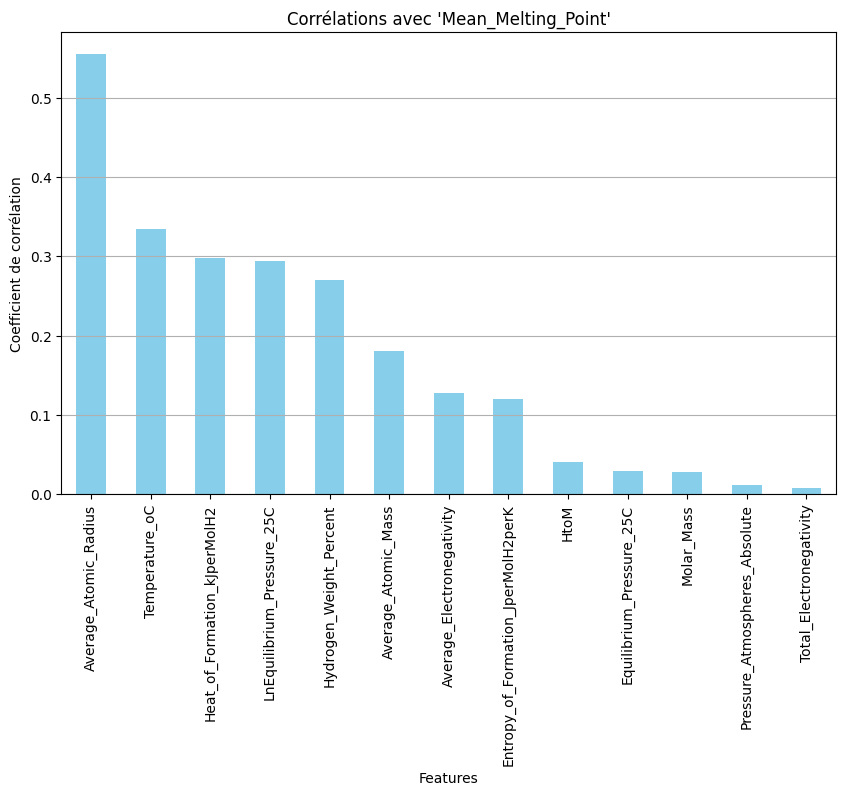

In [ ]:
correlation_with_feature(numerical_data,"Mean_Melting_Point")

## Analyse des corrélations avec `Mean_Melting_Point`

### 1. Corrélation forte avec `Average_Atomic_Radius`
- Le **rayon atomique moyen** est fortement corrélé avec la température de fusion moyenne.
- **Raison** : Les matériaux composés d'éléments avec de grands rayons atomiques (comme les métaux alcalins ou alcalino-terreux) ont souvent des températures de fusion plus faibles, tandis que les éléments avec des rayons atomiques plus petits (comme les métaux de transition) ont des températures de fusion plus élevées en raison de leurs fortes interactions interatomiques.

### 2. Corrélation modérée avec `Temperature_oC`
- La température en °C est naturellement corrélée à la température de fusion, car les deux mesurent des propriétés thermiques similaires.
- **Raison** : Les matériaux ayant des températures de fusion élevées nécessitent des conditions thermiques extrêmes pour atteindre leurs points de transformation.

### 3. Corrélation modérée avec `Heat_of_Formation_kJperMolH2`
- La chaleur de formation est également liée à la température de fusion.
- **Raison** : Les matériaux plus stables thermodynamiquement (fortes chaleurs de formation) tendent à avoir des températures de fusion plus élevées, car ils nécessitent plus d'énergie pour briser leurs liaisons.

### 4. Corrélation modérée avec `LnEquilibrium_Pressure_25C`
- La pression d'équilibre logarithmique à 25°C montre une corrélation modérée.
- **Raison** : La température de fusion influence indirectement la stabilité thermique des matériaux, ce qui affecte les pressions d'équilibre dans les systèmes d'adsorption/désorption d'hydrogène.

### 5. Corrélation modérée avec `Hydrogen_Weight_Percent`
- Les matériaux riches en hydrogène ont une corrélation modérée avec la température de fusion.
- **Raison** : Les matériaux composés d'éléments légers (comme le Mg ou le H) ont des températures de fusion plus basses, ce qui peut réduire la corrélation directe.

### 6. Corrélation faible avec `Molar_Mass` et `Pressure_Atmospheres_Absolute`
- La masse molaire et la pression atmosphérique montrent des corrélations faibles.
- **Raison** : Ces propriétés sont influencées par des facteurs indépendants, comme la composition chimique ou les conditions de stockage, et n'ont pas de lien direct avec la température de fusion.

### 7. Absence de corrélation avec `Total_Electronegativity`
- La faible corrélation avec l'électronégativité totale reflète que la température de fusion dépend davantage des interactions interatomiques (liaisons métalliques, covalentes, etc.) que de la polarité chimique globale.

## Implications générales
- Les matériaux ayant une température de fusion élevée sont généralement plus stables thermiquement, avec des rayons atomiques plus petits et des chaleurs de formation plus importantes.
- Les matériaux légers avec de faibles températures de fusion (ex. MgH2) montrent des propriétés différentes, comme une capacité gravimétrique plus élevée mais une stabilité réduite.


In [ ]:
corr("Mean_Melting_Point","Hydrogen_Weight_Percent")

'La corrélation entre Mean_Melting_Point et Hydrogen_Weight_Percent est : -0.26976296308684716'

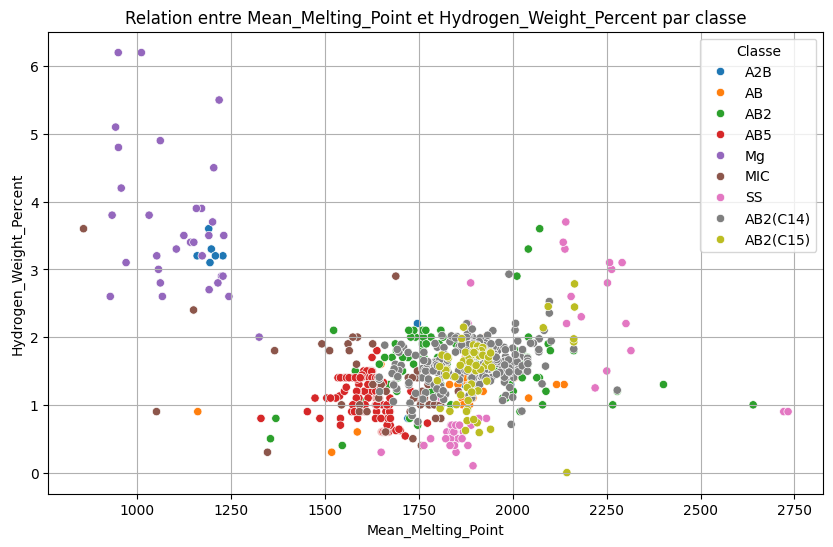

In [ ]:
vs("Mean_Melting_Point","Hydrogen_Weight_Percent")

## Analyse de la relation entre `Mean_Melting_Point` et `Hydrogen_Weight_Percent`

### Tendances globales :

1. **Corrélation inverse partielle :**
   - Les matériaux avec une **Mean_Melting_Point** plus faible (typiquement <1500 K) tendent à avoir des valeurs de **Hydrogen_Weight_Percent** plus élevées, parfois jusqu'à 6%.
   - À l'inverse, les matériaux avec des températures de fusion élevées (>2000 K) montrent généralement un pourcentage massique d'hydrogène faible (<2%).

   **Explication :**
   - Les matériaux à basse température de fusion contiennent souvent des éléments légers comme le magnésium (Mg) et l'hydrogène, qui augmentent la capacité gravimétrique d'hydrogène.
   - Les matériaux à haute température de fusion contiennent davantage de métaux lourds (métaux de transition ou solutions solides), qui sont thermiquement stables mais limitent le stockage d'hydrogène.

2. **Clusters distincts par classe de matériaux :**
   - **Classe Mg (violet) :**
     - Cette classe montre la plus grande dispersion dans **Hydrogen_Weight_Percent**, atteignant jusqu'à **6%** pour des températures de fusion faibles (<1500 K).
     - Cela reflète la nature légère et favorable de cette classe pour le stockage d'hydrogène.
   - **Classes AB, AB2, AB5, AB2(C14), AB2(C15) :**
     - Ces classes présentent des distributions compactes autour de 1–2% de **Hydrogen_Weight_Percent**, avec des températures de fusion typiquement comprises entre 1500 et 2000 K.
     - Ces matériaux équilibrent bien la stabilité thermique et la capacité de stockage.
   - **Classe SS (gris) :**
     - Les matériaux de cette classe montrent des températures de fusion très élevées (>2000 K) mais de faibles pourcentages massiques d'hydrogène (<2%), reflétant leur composition en métaux lourds stables.

---

### Interprétation des points extrêmes :

1. **Points à haute capacité d'hydrogène (>4%) :**
   - Ces points appartiennent principalement à la classe **Mg**, soulignant leur avantage en termes de capacité gravimétrique grâce à des éléments légers comme le magnésium et l'hydrogène.

2. **Points à température de fusion élevée (>2500 K) :**
   - Ces points représentent des matériaux avec une stabilité thermique exceptionnelle mais des capacités limitées pour le stockage d'hydrogène.

---

### Implications générales :

1. **Matériaux légers (classe Mg) :**
   - Idéaux pour maximiser la capacité gravimétrique d'hydrogène, bien qu'ils puissent manquer de stabilité thermique à haute température.

2. **Matériaux stables thermiquement (classe SS et certaines AB2) :**
   - Adaptés pour des applications nécessitant une résistance thermique, mais au détriment de la capacité gravimétrique.

3. **Optimisation possible :**
   - Identifier des matériaux avec une **Mean_Melting_Point** modérée (1500–2000 K) et un **Hydrogen_Weight_Percent** optimisé pour des applications spécifiques (stabilité vs capacité).


# le numéro de Mendeleïev moyen ??

In [ ]:
from pymatgen.core import Composition, Element

# Fonction pour calculer le numéro de Mendeleïev moyen
def calculate_average_mendeleev_number(formula):
    """
    Calcule le numéro de Mendeleïev moyen d'une formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Numéro de Mendeleïev moyen.
    """
    try:
        # Analyser la composition chimique
        composition = Composition(formula)
        total_mendeleev = 0
        total_atoms = 0

        # Parcourir chaque élément et sa quantité
        for element, amount in composition.get_el_amt_dict().items():
            el = Element(element)
            if hasattr(el, "mendeleev_no") and el.mendeleev_no is not None:
                total_mendeleev += el.mendeleev_no * amount
                total_atoms += amount
            else:
                print(f"Attention : Pas de numéro de Mendeleïev défini pour l'élément {element}. Ignoré.")

        # Calculer le numéro de Mendeleïev moyen
        if total_atoms > 0:
            average_mendeleev_number = total_mendeleev / total_atoms
            return average_mendeleev_number
        else:
            return None
    except Exception as e:
        print(f"Erreur lors du traitement de la formule {formula}: {e}")
        return None

# Ajouter une colonne pour le numéro de Mendeleïev moyen
data["Average_Mendeleev_Number"] = data["Composition_Formula"].apply(calculate_average_mendeleev_number)

# Afficher les résultats
print(data[["Composition_Formula", "Average_Mendeleev_Number"]].head())


  Composition_Formula  Average_Mendeleev_Number
0               Th2Al                 58.000000
1               Ti2Cu                 58.000000
2               Zr2Cu                 56.666667
3               Zr2Ni                 55.000000
4               Mg2Ni                 71.000000


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Average_Mendeleev_Number':
Average_Mendeleev_Number              1.000000
Mean_Melting_Point                    0.652049
Average_Atomic_Radius                 0.406764
Average_Electronegativity             0.299371
LnEquilibrium_Pressure_25C            0.179465
Heat_of_Formation_kJperMolH2          0.175290
Hydrogen_Weight_Percent               0.174786
Temperature_oC                        0.166638
HtoM                                  0.110553
Pressure_Atmospheres_Absolute         0.073648
Molar_Mass                            0.063820
Entropy_of_Formation_JperMolH2perK    0.054519
Total_Electronegativity               0.026405
Equilibrium_Pressure_25C              0.008370
Average_Atomic_Mass                   0.005774
Name: Average_Mendeleev_Number, dtype: float64


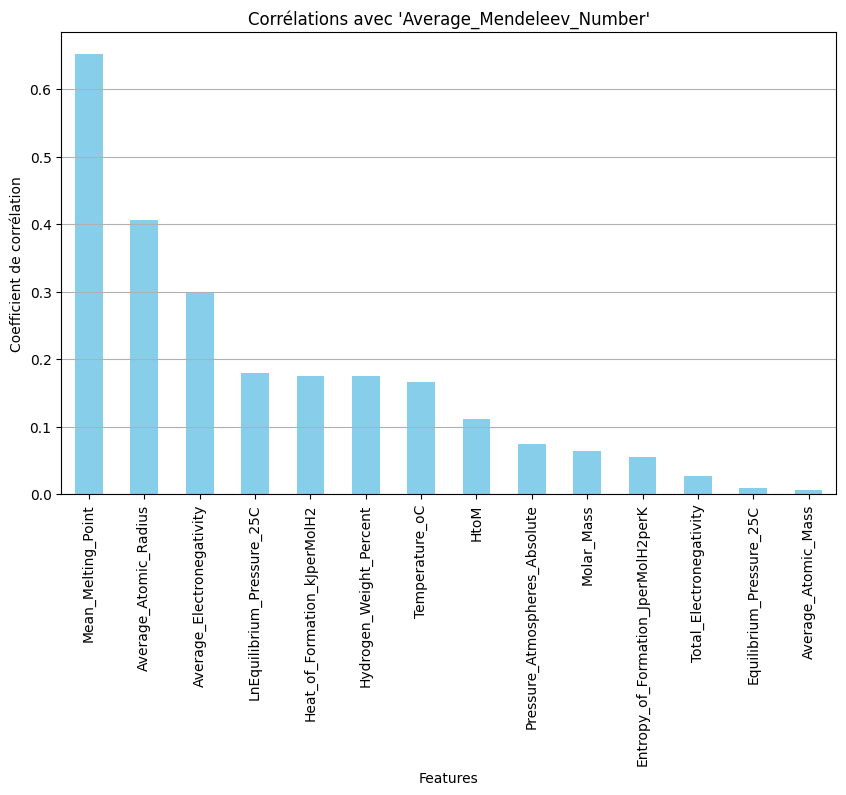

In [ ]:
correlation_with_feature(numerical_data,"Average_Mendeleev_Number")

### Le numéro de Mendeleïev : qu'est-ce que c'est ?
Le **numéro de Mendeleïev moyen** (Average Mendeleev Number) est une caractéristique chimique calculée en fonction de la position des éléments chimiques dans le tableau périodique de Mendeleïev. Ce numéro représente la périodicité des propriétés chimiques et physiques des éléments. Lorsque ce numéro est moyenné sur une formule chimique, il fournit une idée globale des propriétés chimiques du matériau basé sur ses éléments constitutifs.

---

### Interprétation des corrélations dans le graphique :
1. **Corrélation élevée avec le `Mean_Melting_Point` (point de fusion moyen) :**
   - Le numéro de Mendeleïev moyen est fortement corrélé au point de fusion moyen. Cela s'explique par le fait que les propriétés périodiques des éléments (comme les énergies de liaison ou les structures atomiques) influencent directement le point de fusion. Par exemple, les éléments situés dans des blocs spécifiques du tableau périodique (comme les métaux de transition) ont des propriétés bien définies liées à leur position.

2. **Corrélation modérée avec l'`Average_Atomic_Radius` (rayon atomique moyen) :**
   - Le rayon atomique est aussi une propriété périodique. Les matériaux avec un numéro de Mendeleïev moyen plus élevé (provenant d'éléments plus lourds et souvent métalliques) auront un rayon atomique moyen spécifique.

3. **Corrélation avec `Material_Class_Encoded` :**
   - Cette corrélation montre que les classes de matériaux (comme A2B, AB2, etc.) ont des numéros de Mendeleïev moyens différents. Cela est attendu puisque les classes de matériaux impliquent des compositions chimiques distinctes.

4. **Corrélation avec l'`Average_Electronegativity` (électronégativité moyenne) :**
   - Les numéros de Mendeleïev prennent en compte les tendances périodiques, ce qui inclut l'électronégativité. Les matériaux contenant des éléments avec une électronégativité plus élevée peuvent également avoir un numéro de Mendeleïev moyen plus élevé.

5. **Corrélations faibles avec `Hydrogen_Weight_Percent` et `Heat_of_Formation_kJperMolH2` :**
   - Ces corrélations plus faibles indiquent que le numéro de Mendeleïev moyen est moins directement lié aux propriétés spécifiques d'interaction chimique avec l'hydrogène.

6. **Corrélation très faible avec `Pressure_Atmospheres_Absolute` et `Equilibrium_Pressure_25C` :**
   - Ces propriétés sont davantage influencées par des phénomènes physiques locaux (comme les forces d'interaction entre molécules) que par les propriétés périodiques globales des éléments.

---

### Conclusions générales :
- Le numéro de Mendeleïev moyen est une propriété chimique **globale** et périodique, ce qui explique sa corrélation forte avec des propriétés structurales (comme le point de fusion ou le rayon atomique).
- Il est moins pertinent pour des propriétés locales ou spécifiques aux interactions chimiques, comme le stockage d'hydrogène.


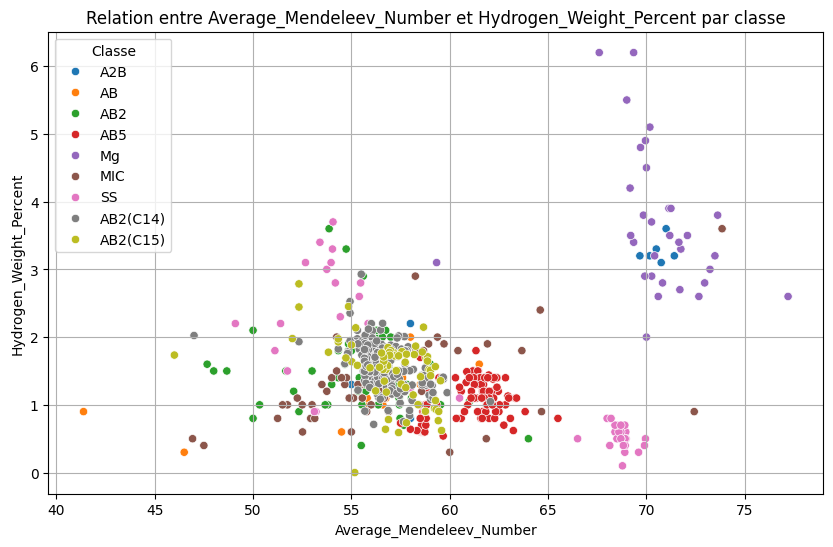

In [ ]:
vs("Average_Mendeleev_Number","Hydrogen_Weight_Percent")

### Analyse du graphique : Relation entre `Average_Mendeleev_Number` et `Hydrogen_Weight_Percent` par classe

1. **Répartition globale des données :**
   - Les points montrent une dispersion non linéaire entre le numéro de Mendeleïev moyen et le pourcentage massique d'hydrogène.
   - La majorité des points se concentre dans une plage de `Average_Mendeleev_Number` entre 50 et 60, correspondant à des matériaux qui contiennent des éléments communs avec des propriétés chimiques intermédiaires.

2. **Variabilité par classe de matériau :**
   - **Classe `Mg` (violet) :** Cette classe présente des valeurs élevées pour le pourcentage massique d'hydrogène (`Hydrogen_Weight_Percent > 4`) avec un numéro de Mendeleïev moyen autour de 70. Cela reflète que les éléments légers tels que Mg dominent cette classe, contribuant à un stockage élevé d'hydrogène en poids.
   - **Classe `SS` (marron) :** Les solutions solides (solid solutions) sont concentrées dans une région de faible pourcentage massique d'hydrogène (`Hydrogen_Weight_Percent < 2`), avec un `Average_Mendeleev_Number` variant autour de 55-60, ce qui reflète des compositions à base d'éléments métalliques plus lourds.
   - **Classes `AB2` et `AB5` (vert et rouge) :** Ces classes ont une distribution plus compacte entre 50 et 60 pour le `Average_Mendeleev_Number` et montrent des valeurs faibles à modérées de pourcentage massique d'hydrogène, ce qui est attendu pour des matériaux équilibrés en composition.

3. **Tendance inverse pour certaines classes :**
   - Les matériaux riches en éléments légers (par exemple, Mg) avec des valeurs élevées de `Hydrogen_Weight_Percent` tendent à avoir des `Average_Mendeleev_Number` plus élevés.
   - À l'inverse, les matériaux contenant des éléments plus lourds présentent des valeurs faibles pour ces deux propriétés.

4. **Absence de points extrêmes :**
   - Les matériaux étudiés ne contiennent pas de compositions avec un `Average_Mendeleev_Number` supérieur à 75 ou inférieur à 45, ce qui est attendu pour des matériaux technologiques conçus pour des propriétés spécifiques.

5. **Applications potentielles :**
   - Les matériaux ayant un `Average_Mendeleev_Number` dans la plage de 50-60 semblent être des candidats pour un stockage modéré d'hydrogène, équilibrant densité énergétique et stabilité chimique.
   - Les matériaux avec un `Average_Mendeleev_Number` élevé (≈70) et des valeurs élevées de `Hydrogen_Weight_Percent` sont prometteurs pour un stockage gravimétrique maximal.

---

### Conclusion
Ce graphique met en évidence la relation complexe entre la composition chimique (représentée par le numéro de Mendeleïev moyen) et la capacité de stockage d'hydrogène. Une analyse approfondie, en tenant compte de la structure cristalline et des propriétés thermodynamiques, pourrait fournir des informations supplémentaires sur l'optimisation de ces matériaux.


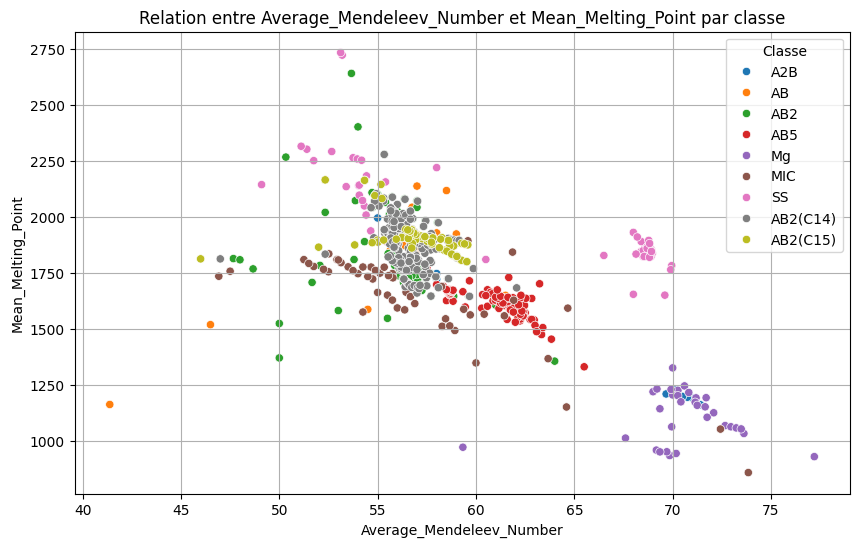

In [ ]:
vs("Average_Mendeleev_Number","Mean_Melting_Point")

### Corrélation entre `Average_Mendeleev_Number` et `Mean_Melting_Point`

Une légère corrélation négative semble être présente entre le `Average_Mendeleev_Number` et le `Mean_Melting_Point`. Cette observation peut être expliquée physiquement comme suit :

1. **Nature du numéro de Mendeleïev moyen** :
   - Le **numéro de Mendeleïev** correspond à l'ordre des éléments dans le tableau périodique.
   - Un **numéro élevé** indique des éléments situés vers la droite du tableau périodique (métaux légers comme Mg, Al).
   - Un **numéro faible** représente des éléments situés vers la gauche (métaux lourds comme Fe, W, Ni).

2. **Points de fusion et énergie de cohésion** :
   - Le **point de fusion** dépend de l'énergie nécessaire pour surmonter les forces interatomiques qui maintiennent les atomes ensemble dans le réseau cristallin.
   - Les éléments légers (numéro élevé) forment des liaisons plus faibles en raison de leur faible densité électronique et de réseaux cristallins moins denses.
   - Les éléments lourds (numéro faible) forment des liaisons plus fortes en raison de leur densité électronique élevée et de réseaux cristallins compacts.

3. **Comparaison entre matériaux légers et lourds** :
   - **Matériaux légers (Mg, Al)** :
     - Faible énergie de cohésion due à des interactions métalliques modérées.
     - Structures cristallines (ex. hexagonal compact pour Mg) nécessitant moins d'énergie thermique pour rompre les liaisons.
     - Résultat : point de fusion faible.
   - **Matériaux lourds (Fe, W, Ni)** :
     - Forte énergie de cohésion due à des interactions métalliques intenses.
     - Structures cristallines compactes (ex. cubique à faces centrées pour Fe) nécessitant plus d'énergie thermique pour fondre.
     - Résultat : point de fusion élevé.

4. **Lien avec la corrélation négative** :
   - Lorsque le **numéro de Mendeleïev moyen augmente** (éléments légers comme Mg, Al), les matériaux nécessitent moins d'énergie pour fondre, ce qui abaisse le point de fusion.
   - Lorsque le **numéro de Mendeleïev moyen diminue** (éléments lourds comme Fe, W), les matériaux nécessitent plus d'énergie pour fondre, ce qui élève le point de fusion.

5. **Explication énergétique** :
   - Les matériaux légers ont des électrons de valence éloignés du noyau (faible énergie de liaison) et des interactions métalliques moins intenses.
   - Les matériaux lourds ont des électrons de valence fortement liés au noyau et des interactions métalliques plus fortes.

### Conclusion
Cette corrélation négative est un reflet direct des propriétés interatomiques :
- Les matériaux légers (numéro élevé) ont des réseaux cristallins moins stables et des points de fusion plus bas.
- Les matériaux lourds (numéro faible) ont des réseaux cristallins très stables et des points de fusion plus élevés.


#Volume atomique moyen

In [ ]:
import math

def calculate_average_volume(formula):
    """
    Calcule le volume atomique moyen à partir de la formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Volume atomique moyen en angströms³.
    """
    try:
        composition = Composition(formula)
        total_volume = 0
        total_atoms = 0
        for element, amount in composition.get_el_amt_dict().items():
            if element in atomic_radii:  # Vérifier que le rayon atomique est connu
                radius = atomic_radii[element]
                volume = (4/3) * math.pi * (radius**3)
                total_volume += volume * amount
                total_atoms += amount
        return total_volume / total_atoms if total_atoms > 0 else None
    except Exception as e:
        print(f"Erreur lors du traitement de la formule {formula}: {e}")
        return None

# Ajouter une colonne pour le volume atomique moyen
data["Average_Atomic_Volume"] = data["Composition_Formula"].apply(calculate_average_volume)

# Afficher les résultats
print(data[["Composition_Formula", "Average_Atomic_Volume"]].head())


  Composition_Formula  Average_Atomic_Volume
0               Th2Al               6.882316
1               Ti2Cu              19.480914
2               Zr2Cu              28.668439
3               Zr2Ni              29.030524
4               Mg2Ni              13.132135


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Average_Atomic_Volume':
Average_Atomic_Volume                 1.000000
Average_Atomic_Radius                 0.811694
Mean_Melting_Point                    0.684563
Average_Mendeleev_Number              0.539190
Hydrogen_Weight_Percent               0.188041
Entropy_of_Formation_JperMolH2perK    0.182560
Heat_of_Formation_kJperMolH2          0.117700
Temperature_oC                        0.114342
Average_Atomic_Mass                   0.105644
HtoM                                  0.089575
Pressure_Atmospheres_Absolute         0.083043
LnEquilibrium_Pressure_25C            0.061279
Total_Electronegativity               0.041875
Average_Electronegativity             0.038442
Equilibrium_Pressure_25C              0.037016
Molar_Mass                            0.031004
Name: Average_Atomic_Volume, dtype: float64


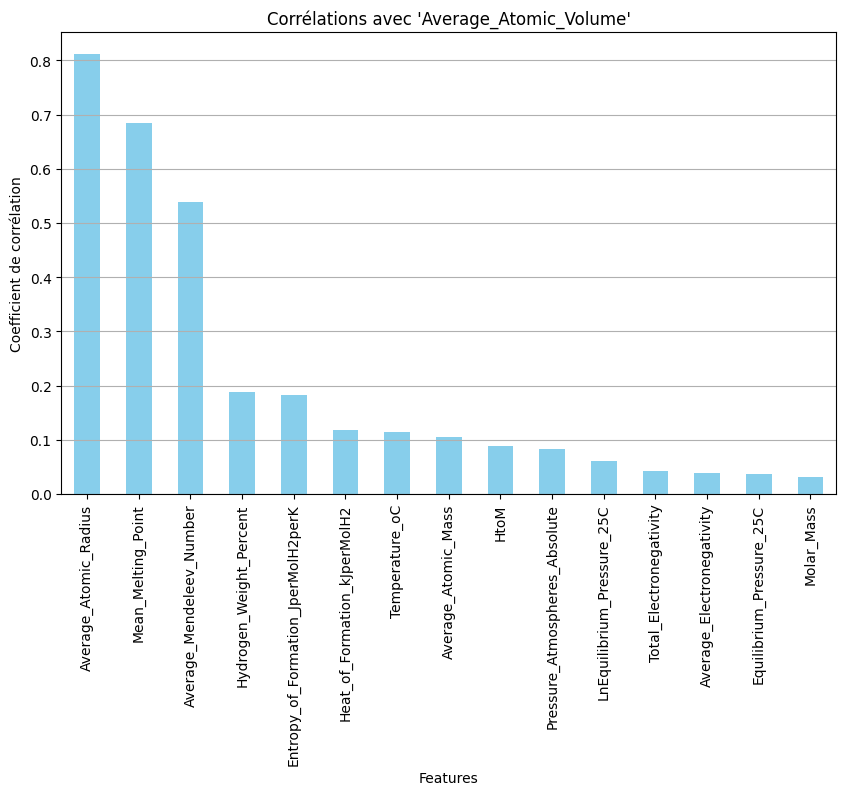

In [ ]:
correlation_with_feature(numerical_data,"Average_Atomic_Volume")

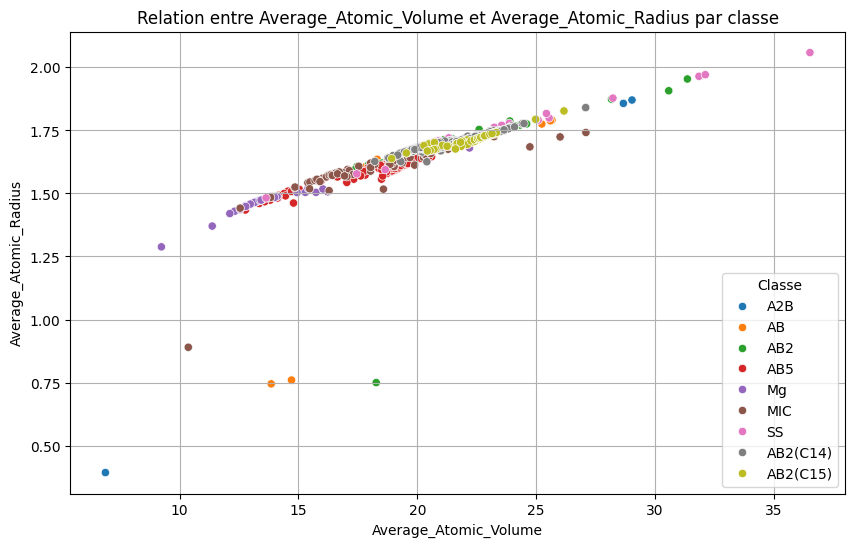

In [ ]:
vs("Average_Atomic_Volume","Average_Atomic_Radius")

#Densité

In [ ]:
# Constante : Nombre d'Avogadro
AVOGADRO_NUMBER = 6.022e23  # mol^-1

def calculate_theoretical_density(row):
    """
    Calcule la densité théorique d'un matériau.
    :param row: Ligne du DataFrame contenant Molar_Mass (g/mol) et Average_Atomic_Volume (Å³).
    :return: Densité théorique (g/cm³) ou None si les données sont manquantes.
    """
    try:
        molar_mass = row["Molar_Mass"]  # Masse molaire en g/mol
        atomic_volume = row["Average_Atomic_Volume"]  # Volume atomique moyen en Å³
        if pd.notnull(molar_mass) and pd.notnull(atomic_volume) and atomic_volume > 0:
            # Conversion du volume atomique de Å³ à cm³
            atomic_volume_cm3 = atomic_volume * 1e-24
            # Formule pour la densité théorique
            density = molar_mass / (AVOGADRO_NUMBER * atomic_volume_cm3)
            return density
        else:
            return None
    except Exception as e:
        print(f"Erreur lors du calcul de la densité théorique : {e}")
        return None

# Appliquer la fonction sur le DataFrame
data["Theoretical_Density"] = data.apply(calculate_theoretical_density, axis=1)

# Affichage des résultats
print(data[["Composition_Formula", "Molar_Mass", "Average_Atomic_Volume", "Theoretical_Density"]].head())


  Composition_Formula  Molar_Mass  Average_Atomic_Volume  Theoretical_Density
0               Th2Al  491.057659               6.882316           118.483290
1               Ti2Cu  159.280000              19.480914            13.577230
2               Zr2Cu  245.994000              28.668439            14.248847
3               Zr2Ni  241.141400              29.030524            13.793553
4               Mg2Ni  107.303400              13.132135            13.568673


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Theoretical_Density':
Theoretical_Density                   1.000000
Molar_Mass                            0.975769
Total_Electronegativity               0.965132
Entropy_of_Formation_JperMolH2perK    0.192321
Average_Atomic_Radius                 0.160091
Average_Atomic_Volume                 0.152626
Heat_of_Formation_kJperMolH2          0.115840
HtoM                                  0.106598
Average_Atomic_Mass                   0.074302
Mean_Melting_Point                    0.055734
LnEquilibrium_Pressure_25C            0.054836
Hydrogen_Weight_Percent               0.043529
Temperature_oC                        0.042959
Pressure_Atmospheres_Absolute         0.033340
Equilibrium_Pressure_25C              0.021272
Average_Electronegativity             0.011998
Average_Mendeleev_Number              0.008469
Name: Theoretical_Density, dtype: float64


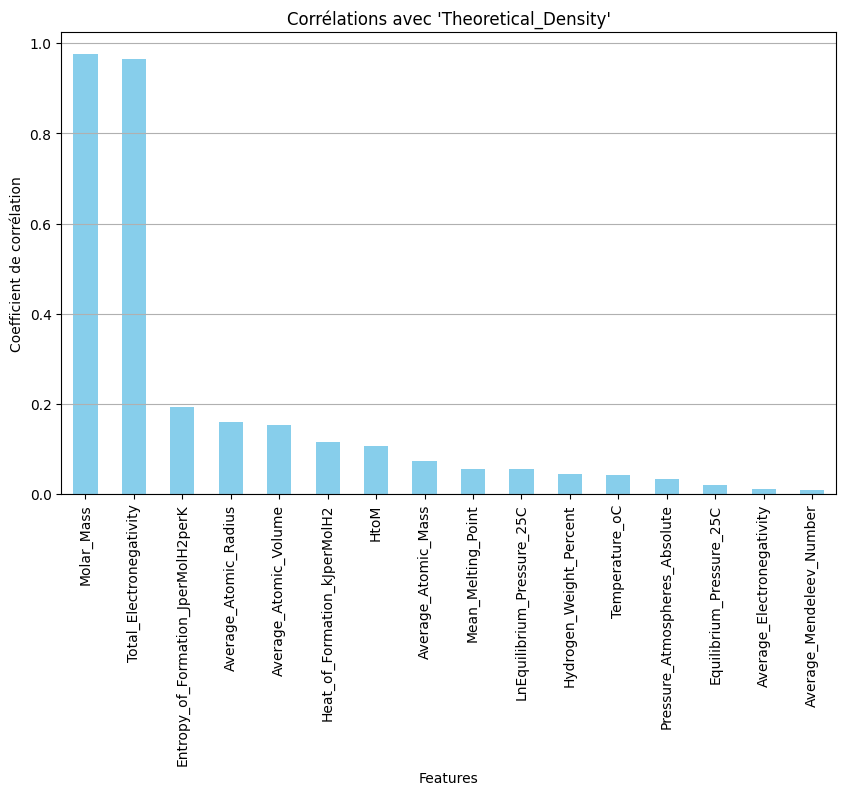

In [ ]:
correlation_with_feature(numerical_data,"Theoretical_Density")

# compacité

In [ ]:
def calculate_packing_density(row):
    """
    Calcule l'indice de compacité d'un matériau.
    :param row: Ligne du DataFrame contenant Molar_Mass, Theoretical_Density et Average_Atomic_Volume.
    :return: Indice de compacité ou None si les données sont manquantes.
    """
    try:
        molar_mass = row["Molar_Mass"]  # Masse molaire (g/mol)
        theoretical_density = row["Theoretical_Density"]  # Densité théorique (g/cm³)
        atomic_volume = row["Average_Atomic_Volume"]  # Volume atomique moyen (Å³)

        if pd.notnull(molar_mass) and pd.notnull(theoretical_density) and pd.notnull(atomic_volume) and atomic_volume > 0:
            # Conversion du volume atomique de Å³ à cm³
            atomic_volume_cm3 = atomic_volume * 1e-24
            # Formule pour l'indice de compacité
            packing_density = (theoretical_density * AVOGADRO_NUMBER * atomic_volume_cm3) / molar_mass
            return packing_density
        else:
            return None
    except Exception as e:
        print(f"Erreur lors du calcul de l'indice de compacité : {e}")
        return None

# Appliquer la fonction sur le DataFrame
data["Packing_Density"] = data.apply(calculate_packing_density, axis=1)

# Affichage des résultats
print(data[["Composition_Formula", "Molar_Mass", "Theoretical_Density", "Average_Atomic_Volume", "Packing_Density"]].head())


  Composition_Formula  Molar_Mass  Theoretical_Density  Average_Atomic_Volume  \
0               Th2Al  491.057659           118.483290               6.882316   
1               Ti2Cu  159.280000            13.577230              19.480914   
2               Zr2Cu  245.994000            14.248847              28.668439   
3               Zr2Ni  241.141400            13.793553              29.030524   
4               Mg2Ni  107.303400            13.568673              13.132135   

   Packing_Density  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  


In [ ]:
numerical_data1 = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Packing_Density':
Packing_Density                       1.000000
LnEquilibrium_Pressure_25C            0.296098
Heat_of_Formation_kJperMolH2          0.290271
Average_Atomic_Radius                 0.246143
Average_Atomic_Volume                 0.185036
Temperature_oC                        0.128087
Mean_Melting_Point                    0.116363
Average_Electronegativity             0.098003
Average_Atomic_Mass                   0.094516
Entropy_of_Formation_JperMolH2perK    0.092772
Average_Mendeleev_Number              0.043791
Total_Electronegativity               0.035786
Pressure_Atmospheres_Absolute         0.031548
Molar_Mass                            0.024931
Equilibrium_Pressure_25C              0.016990
HtoM                                  0.007537
Theoretical_Density                   0.006101
Hydrogen_Weight_Percent               0.000729
Name: Packing_Density, dtype: float64


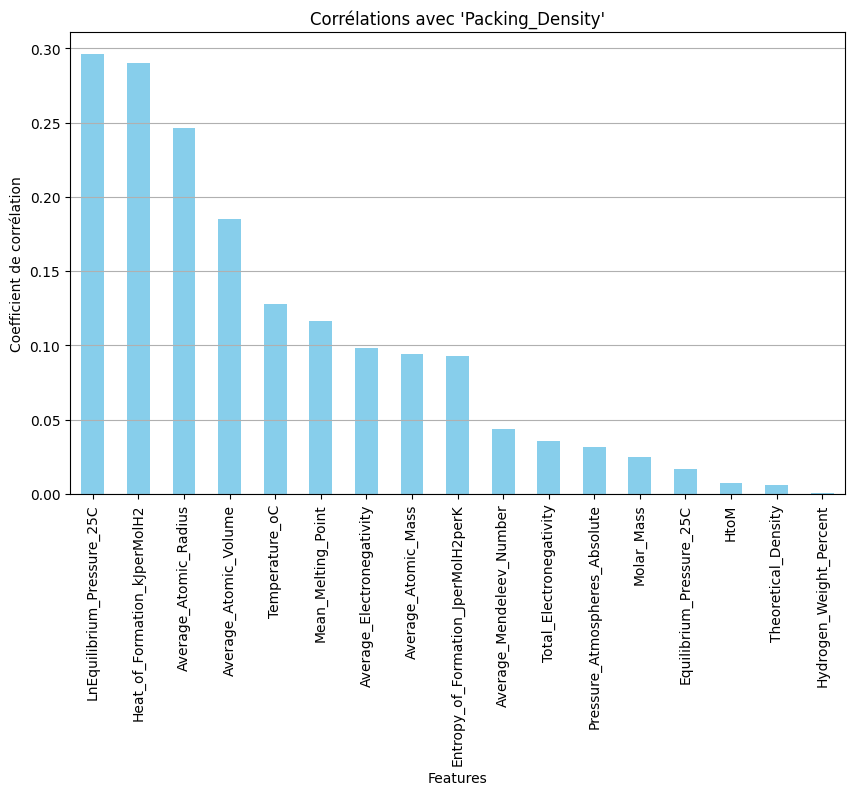

In [ ]:
correlation_with_feature(numerical_data1,"Packing_Density")

#affinité électronique ??

In [ ]:
from pymatgen.core import Composition, Element

# Dictionnaire des affinités électroniques (en eV)
# Dictionnaire des affinités électroniques (eV) mis à jour
# Dictionnaire mis à jour avec les affinités électroniques manquantes
electron_affinities = {
    # Métaux de transition
    "H": 0.754, "Li": 0.618, "Be": 0.0, "B": 0.277, "C": 1.262, "N": -0.07, "O": 1.461,
    "F": 3.401, "Na": 0.548, "Mg": 0.0, "Al": 0.441, "Si": 1.385, "P": 0.746, "S": 2.077,
    "Cl": 3.612, "K": 0.501, "Ca": 0.024, "Sc": 0.188, "Ti": 0.079, "V": 0.525, "Cr": 0.666,
    "Mn": 0.0, "Fe": 0.151, "Co": 0.662, "Ni": 1.157, "Cu": 1.235, "Zn": 0.0, "Ga": 0.3,
    "Ge": 1.23, "As": 0.814, "Se": 2.020, "Br": 3.363, "Rb": 0.486, "Sr": 0.048, "Y": 0.307,
    "Zr": 0.426, "Nb": 0.893, "Mo": 0.747, "Tc": 0.55, "Ru": 1.05, "Rh": 1.142, "Pd": 0.562,
    "Ag": 1.304, "Cd": 0.0, "In": 0.3, "Sn": 1.112, "Sb": 1.047, "Te": 1.971, "I": 3.059,
    "Pt": 2.125, "Ir": 1.57, "Bi": 0.946,

    # Ajout des éléments manquants
    "Hf": 0.178,  # Hafnium
    "Ta": 0.322,  # Tantale
    "W": 0.815,   # Tungstène

    # Lanthanides (approximations)
    "La": 0.47, "Ce": 0.5, "Pr": 0.5, "Nd": 0.5, "Pm": 0.2, "Sm": 0.5, "Eu": 0.0,
    "Gd": 0.5, "Tb": 0.5, "Dy": 0.5, "Ho": 0.5, "Er": 0.5, "Tm": 0.5, "Yb": 0.0, "Lu": 0.5,

    # Actinides (approximations)
    "Th": 0.0, "Pa": 0.14, "U": 0.13, "Np": 0.21, "Pu": 0.03
}


# Fonction pour calculer l'affinité électronique moyenne
def calculate_average_electron_affinity(formula):
    """
    Calcule l'affinité électronique moyenne à partir de la formule chimique.
    :param formula: Formule chimique (ex. "MgH2").
    :return: Affinité électronique moyenne (eV).
    """
    try:
        composition = Composition(formula)
        total_affinity = 0
        total_atoms = 0

        for element, amount in composition.get_el_amt_dict().items():
            if element in electron_affinities:
                total_affinity += electron_affinities[element] * amount
                total_atoms += amount
            else:
                print(f"Affinité électronique non définie pour l'élément {element}.")

        return total_affinity / total_atoms if total_atoms > 0 else None
    except Exception as e:
        print(f"Erreur lors du calcul de l'affinité électronique pour {formula}: {e}")
        return None

# Ajouter une colonne pour l'affinité électronique moyenne
data["Average_Electron_Affinity"] = data["Composition_Formula"].apply(calculate_average_electron_affinity)

# Afficher les résultats
print(data[["Composition_Formula", "Average_Electron_Affinity"]].head())


  Composition_Formula  Average_Electron_Affinity
0               Th2Al                   0.147000
1               Ti2Cu                   0.464333
2               Zr2Cu                   0.695667
3               Zr2Ni                   0.669667
4               Mg2Ni                   0.385667


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Average_Electron_Affinity':
Average_Electron_Affinity             1.000000
Average_Electronegativity             0.485603
Average_Atomic_Mass                   0.395646
Hydrogen_Weight_Percent               0.332946
Average_Mendeleev_Number              0.277623
Temperature_oC                        0.190203
Theoretical_Density                   0.185896
Average_Atomic_Radius                 0.178677
HtoM                                  0.174968
Average_Atomic_Volume                 0.168538
Molar_Mass                            0.165973
Mean_Melting_Point                    0.137913
Total_Electronegativity               0.126033
Pressure_Atmospheres_Absolute         0.100921
Heat_of_Formation_kJperMolH2          0.090075
Entropy_of_Formation_JperMolH2perK    0.085041
LnEquilibrium_Pressure_25C            0.068994
Equilibrium_Pressure_25C              0.055907
Packing_Density                       0.027213
Name: Average_Electron_Affinity, dtype: float64


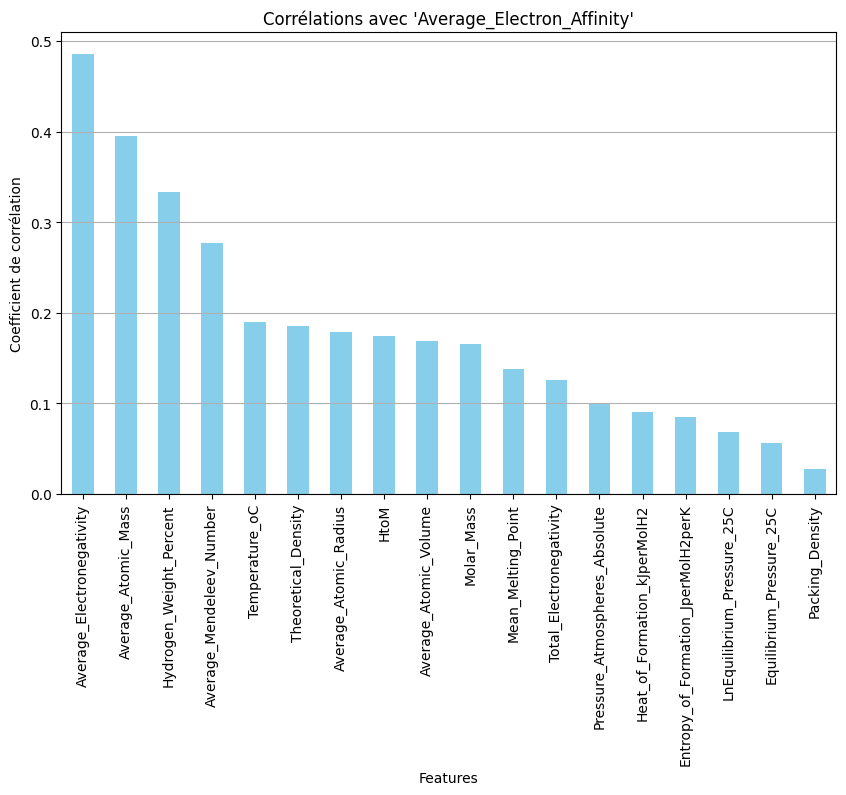

In [ ]:
correlation_with_feature(numerical_data,"Average_Electron_Affinity")

Analyse des corrélations avec **l'Affinité électronique moyenne**

## Corrélations principales

### 1. **Corrélation forte avec Average_Electronegativity (0.5)**
- **Explication physique** :
  - L'affinité électronique et l'électronégativité sont toutes deux liées à la tendance d'un atome à attirer ou à gagner des électrons.
  - Les matériaux avec une électronégativité élevée (par exemple, contenant des éléments comme le fluor ou l'oxygène) présentent également une affinité électronique élevée.
- **Implication** : Les matériaux contenant des éléments très électronégatifs auront une affinité électronique plus élevée.

---

### 2. **Corrélation modérée avec Average_Atomic_Mass (≈0.35)**
- **Explication physique** :
  - Les matériaux avec des éléments de masse atomique moyenne ou élevée peuvent inclure des éléments des groupes principaux avec une affinité électronique modérée à élevée (par exemple, le chlore ou le soufre).
  - Cependant, cette corrélation n'est pas très forte car certains métaux lourds (comme les métaux de transition) ont une faible affinité électronique.

---

### 3. **Corrélation notable avec Material_Class_Encoded (≈0.33)**
- **Explication physique** :
  - Les classes de matériaux influencent directement leur composition chimique. Par exemple, les matériaux riches en éléments électronégatifs (comme les oxydes) appartiennent souvent à des classes spécifiques.

---

### 4. **Corrélation modérée avec Hydrogen_Weight_Percent (≈0.30)**
- **Explication physique** :
  - Les matériaux légers contenant de l'hydrogène peuvent inclure des éléments très électronégatifs comme l'oxygène ou le fluor, ce qui augmente leur affinité électronique moyenne.

---

### 5. **Corrélation notable avec Average_Mendeleev_Number (≈0.25)**
- **Explication physique** :
  - Le numéro de Mendeleïev est lié à la position des éléments dans le tableau périodique. Les éléments des groupes principaux, qui ont une affinité électronique plus élevée, se situent généralement dans des périodes spécifiques avec des numéros de Mendeleïev moyens à élevés.

---





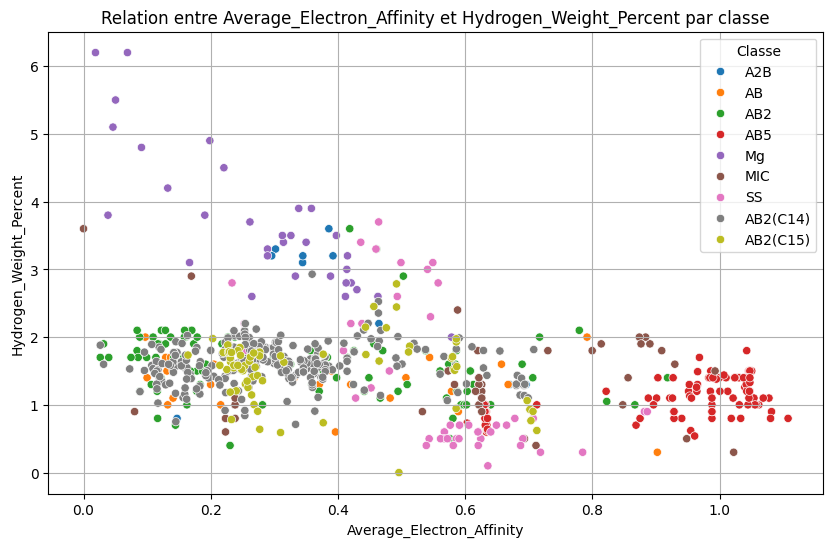

In [ ]:
vs("Average_Electron_Affinity","Hydrogen_Weight_Percent")

In [ ]:
from pymatgen.core import Composition, Element

# Dictionnaire des périodes des éléments
periods = {
    "H": 1, "He": 1, "Li": 2, "Be": 2, "B": 2, "C": 2, "N": 2, "O": 2, "F": 2, "Ne": 2,
    "Na": 3, "Mg": 3, "Al": 3, "Si": 3, "P": 3, "S": 3, "Cl": 3, "Ar": 3,
    "K": 4, "Ca": 4, "Sc": 4, "Ti": 4, "V": 4, "Cr": 4, "Mn": 4, "Fe": 4, "Co": 4, "Ni": 4,
    "Cu": 4, "Zn": 4, "Ga": 4, "Ge": 4, "As": 4, "Se": 4, "Br": 4, "Kr": 4,
    "Rb": 5, "Sr": 5, "Y": 5, "Zr": 5, "Nb": 5, "Mo": 5, "Tc": 5, "Ru": 5, "Rh": 5,
    "Pd": 5, "Ag": 5, "Cd": 5, "In": 5, "Sn": 5, "Sb": 5, "Te": 5, "I": 5, "Xe": 5,
    "Cs": 6, "Ba": 6, "La": 6, "Ce": 6, "Pr": 6, "Nd": 6, "Pm": 6, "Sm": 6,
    "Eu": 6, "Gd": 6, "Tb": 6, "Dy": 6, "Ho": 6, "Er": 6, "Tm": 6, "Yb": 6, "Lu": 6,
    "Hf": 6, "Ta": 6, "W": 6, "Re": 6, "Os": 6, "Ir": 6, "Pt": 6, "Au": 6, "Hg": 6,
    "Tl": 6, "Pb": 6, "Bi": 6, "Po": 6, "At": 6, "Rn": 6,
    "Fr": 7, "Ra": 7, "Ac": 7, "Th": 7, "Pa": 7, "U": 7, "Np": 7, "Pu": 7
}

# Fonction pour calculer le Period Weighted Sum
def calculate_period_weighted_sum(formula):
    """
    Calcule la somme pondérée des périodes d'un matériau.
    :param formula: Formule chimique (ex. "MgH2").
    :return: PWS (float).
    """
    try:
        composition = Composition(formula)
        total_period_sum = 0
        total_atoms = 0

        for element, amount in composition.get_el_amt_dict().items():
            if element in periods:
                total_period_sum += periods[element] * amount
                total_atoms += amount
            else:
                print(f"Période non définie pour l'élément {element}.")

        return total_period_sum / total_atoms if total_atoms > 0 else None
    except Exception as e:
        print(f"Erreur lors du calcul du PWS pour {formula}: {e}")
        return None

# Appliquer la fonction sur le DataFrame
data["Period_Weighted_Sum"] = data["Composition_Formula"].apply(calculate_period_weighted_sum)

# Afficher les résultats
print(data[["Composition_Formula", "Period_Weighted_Sum"]].head())


  Composition_Formula  Period_Weighted_Sum
0               Th2Al             5.666667
1               Ti2Cu             4.000000
2               Zr2Cu             4.666667
3               Zr2Ni             4.666667
4               Mg2Ni             3.333333


In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Period_Weighted_Sum':
Period_Weighted_Sum                   1.000000
Hydrogen_Weight_Percent               0.676354
Mean_Melting_Point                    0.425453
Average_Electronegativity             0.393416
Average_Atomic_Volume                 0.368186
Average_Electron_Affinity             0.319279
Temperature_oC                        0.216480
Entropy_of_Formation_JperMolH2perK    0.202663
Average_Mendeleev_Number              0.195190
HtoM                                  0.186542
Average_Atomic_Radius                 0.065273
Total_Electronegativity               0.048066
Molar_Mass                            0.042649
LnEquilibrium_Pressure_25C            0.041464
Equilibrium_Pressure_25C              0.040517
Heat_of_Formation_kJperMolH2          0.035480
Pressure_Atmospheres_Absolute         0.033730
Theoretical_Density                   0.029317
Packing_Density                       0.024560
Name: Period_Weighted_Sum, dtype: float64


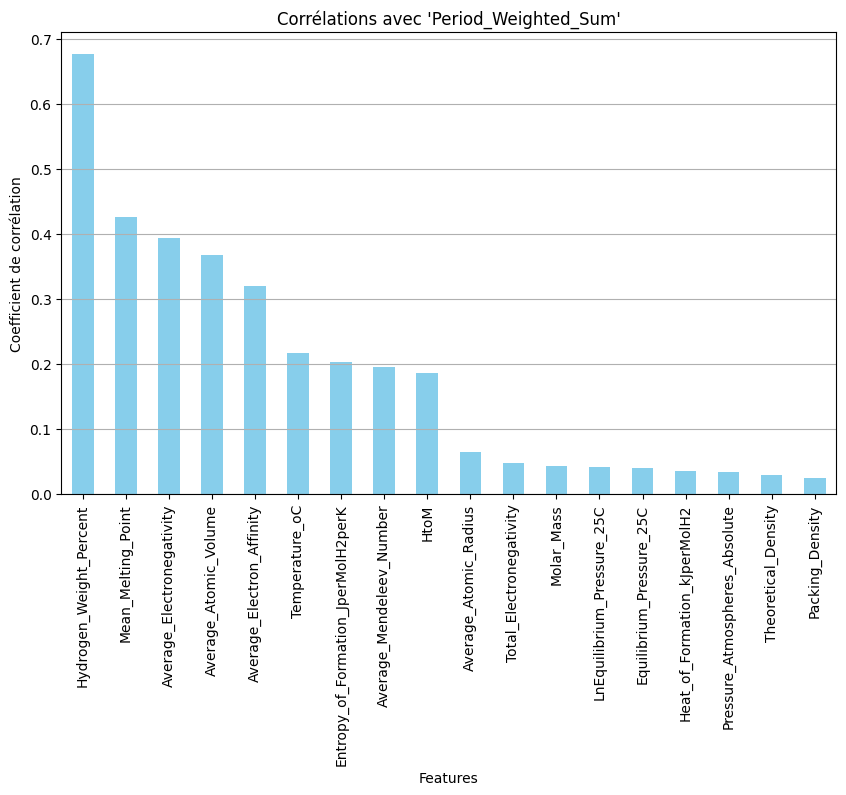

In [ ]:
correlation_with_feature(numerical_data.drop(columns=["Average_Atomic_Mass"]), "Period_Weighted_Sum")


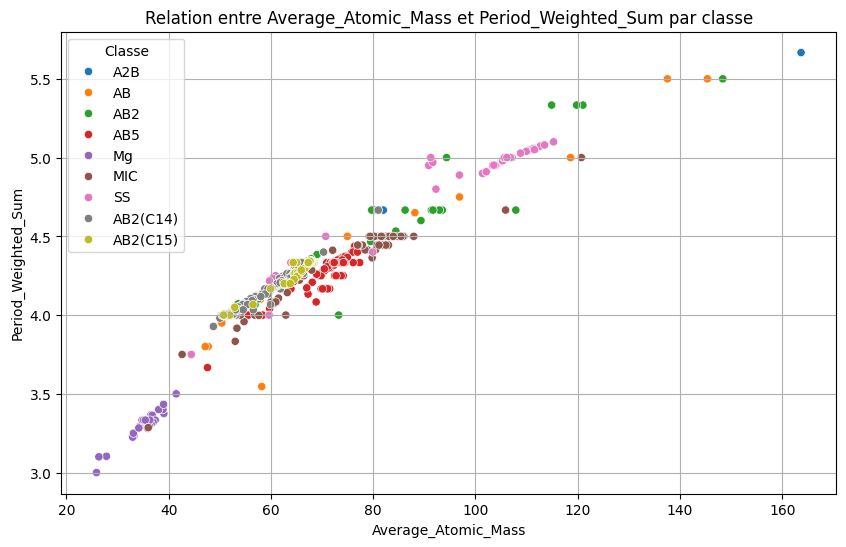

In [ ]:
vs("Average_Atomic_Mass","Period_Weighted_Sum")

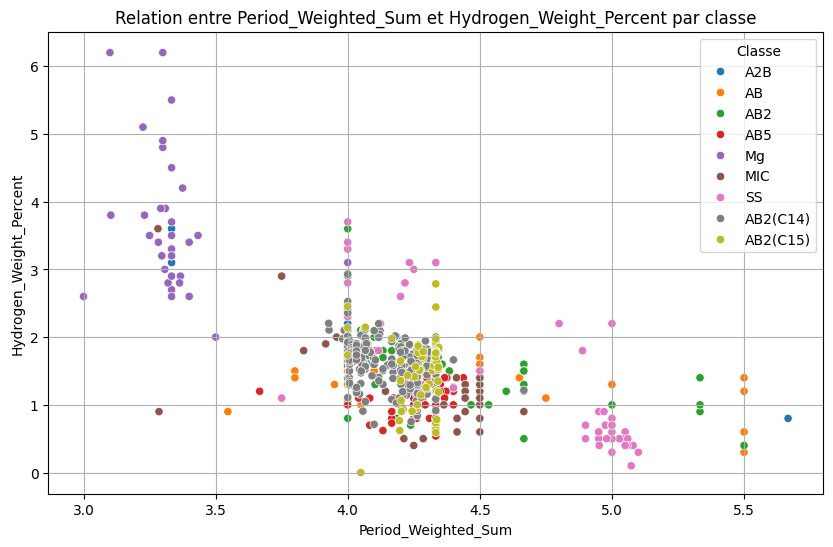

In [ ]:
vs("Period_Weighted_Sum","Hydrogen_Weight_Percent")

Analyse de la relation entre Average_Atomic_Mass et Period_Weighted_Sum (PWS)

## 1. Tendance globale linéaire
- Une **relation linéaire forte** est observée entre la **Masse atomique moyenne** et le **PWS**.
- **Interprétation physique** :
  - Le PWS est calculé en fonction des périodes des éléments dans le tableau périodique. Les éléments avec des masses atomiques plus élevées appartiennent généralement à des périodes plus grandes, ce qui se reflète directement dans le PWS.
  - Les matériaux contenant des éléments lourds des périodes inférieures (e.g., lanthanides, actinides) ont des valeurs élevées de PWS et de masse atomique moyenne.

## 2. Groupement par classe
- Les points se regroupent en fonction des **classes de matériaux** :
  - **Classe Mg** : Faible **PWS** et faible **Average_Atomic_Mass**, dominée par des éléments légers comme le magnésium.
  - **Classes AB, AB2** : Regroupement compact à des masses atomiques modérées, indiquant des compositions équilibrées.
  - **Classe AB5** : Légèrement dispersée, contenant des éléments avec des masses atomiques moyennes à élevées.
  - **Classe A2B** : Un point distinct avec une masse atomique moyenne et un PWS exceptionnellement élevés, probablement riche en éléments lourds des périodes supérieures (e.g., actinides comme Th).

## 3. Point remarquable
- Un point pour la classe **A2B** (en haut à droite) montre une valeur très élevée de **Average_Atomic_Mass** et **PWS**.
  - Cela indique un matériau contenant des éléments très lourds, probablement un métal lourd ou un composé riche en actinides comme le thorium.

## 4. Applications potentielles
- **Matériaux avec faible PWS et faible masse atomique** (e.g., Mg) :
  - Adaptés pour des applications nécessitant une légèreté, comme le stockage gravimétrique d'hydrogène.
- **Matériaux avec PWS élevé et masse atomique élevée** :
  - Plus stables thermiquement et chimiquement, adaptés aux applications structurelles et à haute température.
- La corrélation forte entre ces deux propriétés pourrait être utilisée pour prédire le PWS à partir de la masse atomique moyenne, ou inversement.

## 5. Limites et perspectives
- La relation linéaire montre que le PWS est influencé principalement par la masse atomique des éléments constitutifs et leur période, mais elle ne capture pas des aspects structurels ou électroniques complexes.
- Une analyse des résidus pourrait révéler des anomalies spécifiques à certaines classes (e.g., MIC).

Souhaitez-vous approfondir une classe spécifique ou explorer une corrélation plus détaillée ?


In [ ]:
data["Chemical_Stability"] = data["Heat_of_Formation_kJperMolH2"] / data["Average_Electron_Affinity"]
data["Stability_Index"] = data["Chemical_Stability"] / data["Average_Electronegativity"]

In [ ]:
numerical_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=excluded_columns)

Corrélations avec la feature 'Stability_Index':
Stability_Index                       1.000000
Chemical_Stability                    0.970358
Hydrogen_Weight_Percent               0.426300
Average_Electronegativity             0.417194
Temperature_oC                        0.373866
Heat_of_Formation_kJperMolH2          0.359986
LnEquilibrium_Pressure_25C            0.348475
Average_Electron_Affinity             0.329939
Mean_Melting_Point                    0.315830
Average_Atomic_Radius                 0.267583
HtoM                                  0.253890
Period_Weighted_Sum                   0.220795
Average_Atomic_Volume                 0.188303
Entropy_of_Formation_JperMolH2perK    0.159978
Average_Mendeleev_Number              0.126072
Average_Atomic_Mass                   0.125565
Packing_Density                       0.122299
Molar_Mass                            0.047007
Total_Electronegativity               0.045484
Pressure_Atmospheres_Absolute         0.019884
Equilibrium_

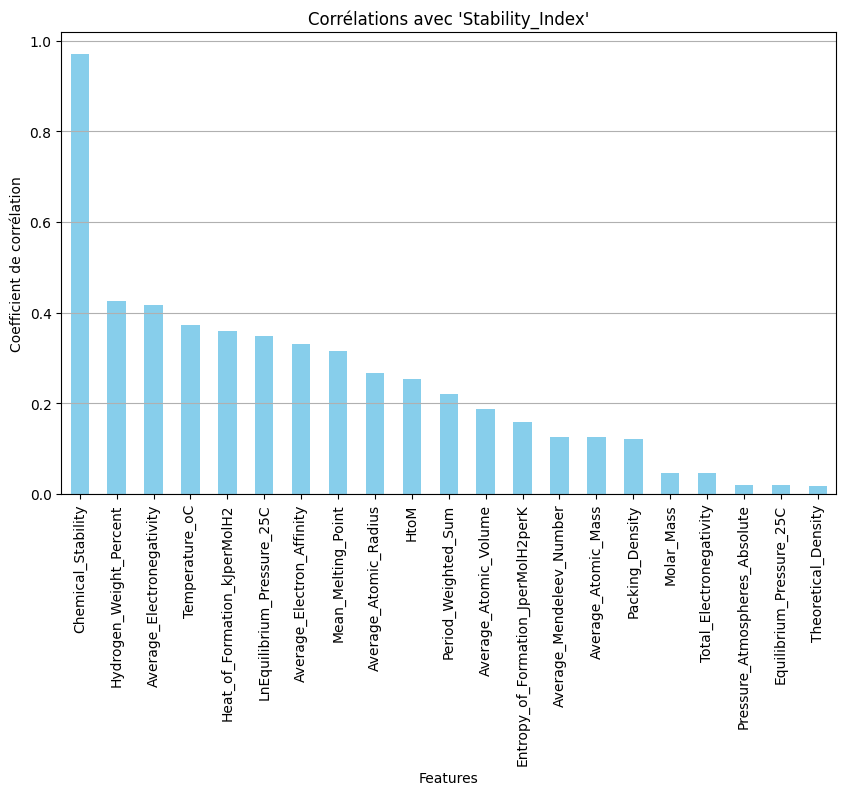

In [ ]:
correlation_with_feature(numerical_data,"Stability_Index")

Corrélations avec la feature 'Chemical_Stability':
Chemical_Stability                    1.000000
Stability_Index                       0.970358
Hydrogen_Weight_Percent               0.464782
Average_Electron_Affinity             0.366214
Average_Electronegativity             0.360611
Temperature_oC                        0.343810
Heat_of_Formation_kJperMolH2          0.328950
Mean_Melting_Point                    0.324913
LnEquilibrium_Pressure_25C            0.305014
Period_Weighted_Sum                   0.289068
HtoM                                  0.256792
Average_Atomic_Mass                   0.209594
Entropy_of_Formation_JperMolH2perK    0.179272
Average_Atomic_Radius                 0.157008
Average_Atomic_Volume                 0.156350
Average_Mendeleev_Number              0.126975
Packing_Density                       0.105338
Molar_Mass                            0.057814
Total_Electronegativity               0.045634
Theoretical_Density                   0.044350
Pressure_

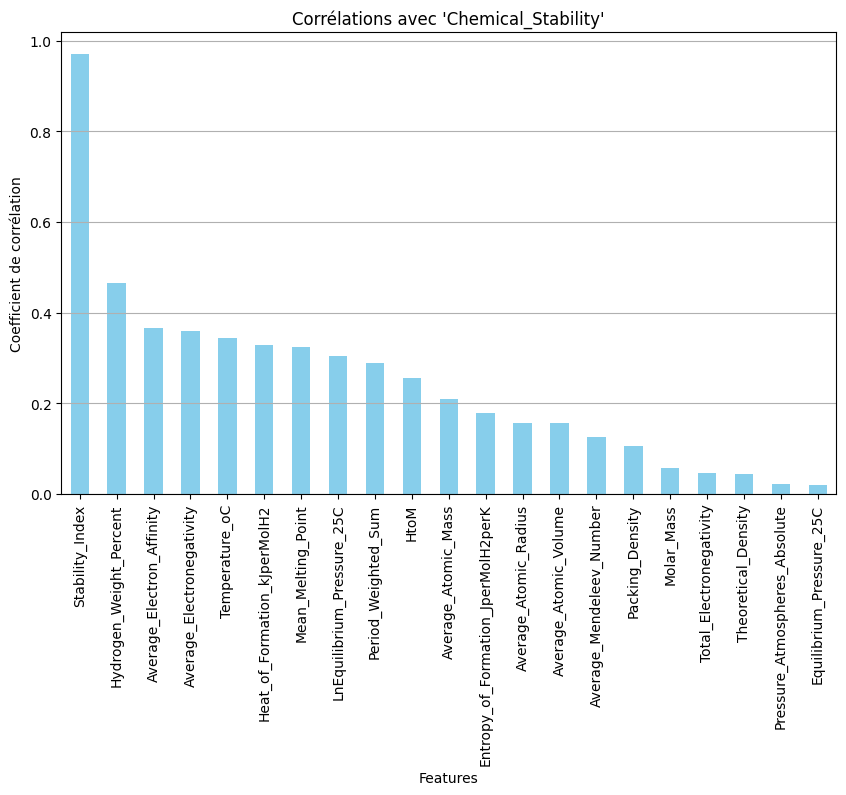

In [ ]:
correlation_with_feature(numerical_data,"Chemical_Stability")

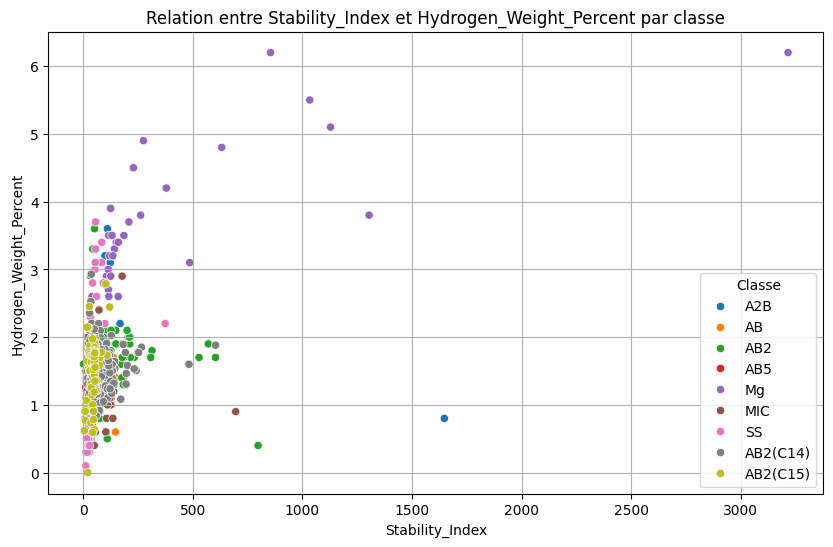

In [ ]:
vs("Stability_Index","Hydrogen_Weight_Percent")

#Corrélation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur
label_encoder = LabelEncoder()

# Appliquer l'encodage
data["Material_Class_Encoded"] = label_encoder.fit_transform(data["Material_Class"])

# Vérifier les classes encodées
print(data[["Material_Class", "Material_Class_Encoded"]].head())

# Liste des classes
print("Mapping des classes :", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


  Material_Class  Material_Class_Encoded
0            A2B                       0
1            A2B                       0
2            A2B                       0
3            A2B                       0
4            A2B                       0
Mapping des classes : {'A2B': 0, 'AB': 1, 'AB2': 2, 'AB2(C14)': 3, 'AB2(C15)': 4, 'AB5': 5, 'MIC': 6, 'Mg': 7, 'SS': 8, nan: 9}


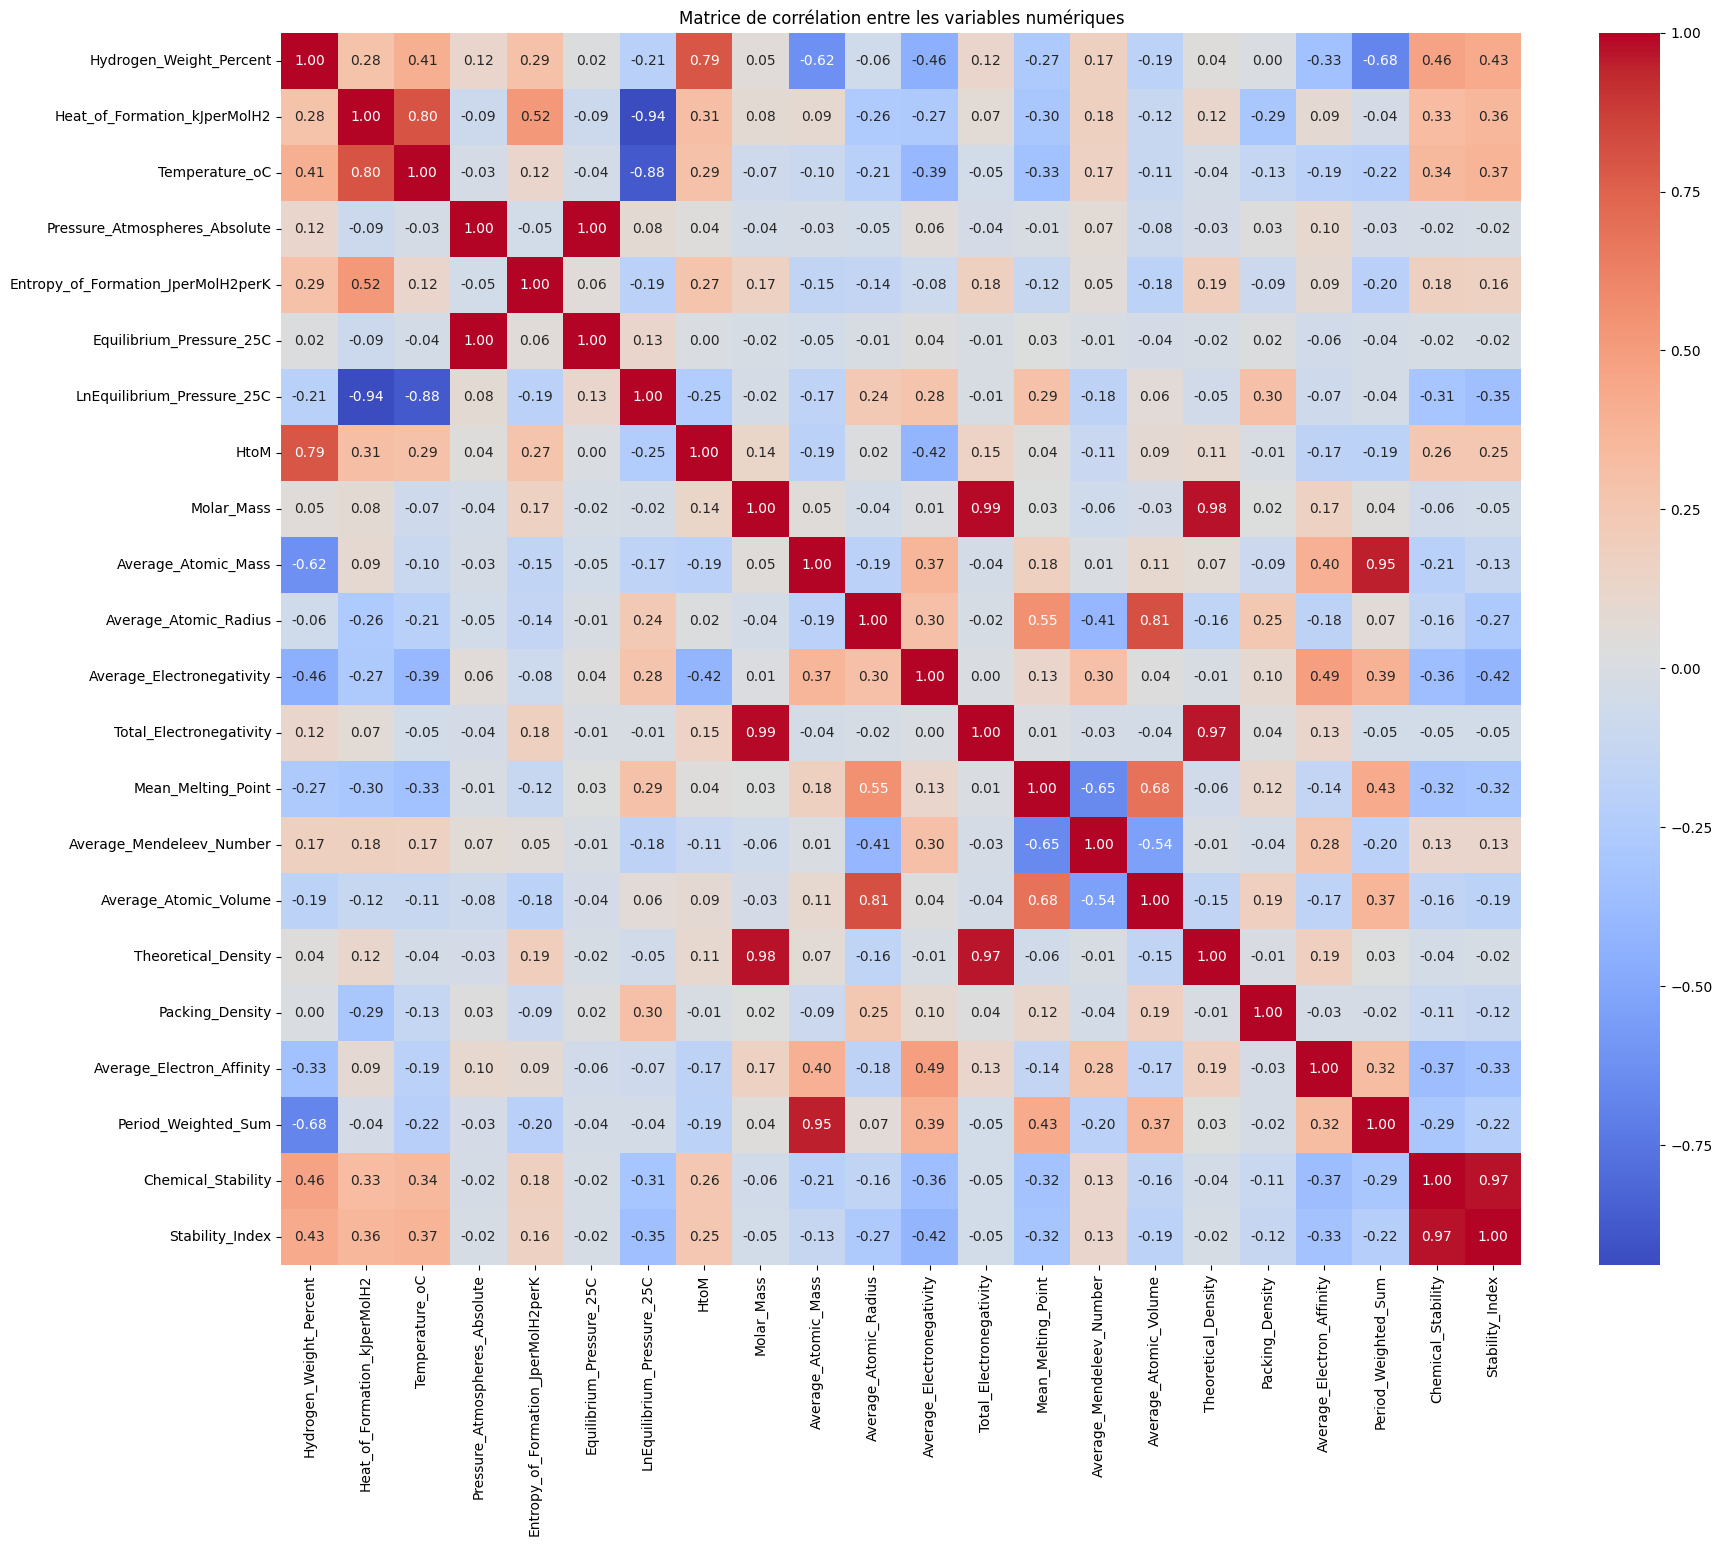

In [ ]:
# Calculer la matrice de corrélation uniquement pour les colonnes numériques
correlation_matrix = numerical_data.corr()

# Visualiser la heatmap de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

In [ ]:
correlation = numerical_data.corr()["Hydrogen_Weight_Percent"].sort_values(ascending=False)
print(correlation)

Hydrogen_Weight_Percent               1.000000
HtoM                                  0.792042
Chemical_Stability                    0.464782
Stability_Index                       0.426300
Temperature_oC                        0.406797
Entropy_of_Formation_JperMolH2perK    0.293077
Heat_of_Formation_kJperMolH2          0.283540
Average_Mendeleev_Number              0.174786
Pressure_Atmospheres_Absolute         0.122745
Total_Electronegativity               0.121983
Molar_Mass                            0.054258
Theoretical_Density                   0.043529
Equilibrium_Pressure_25C              0.019673
Packing_Density                       0.000729
Average_Atomic_Radius                -0.060253
Average_Atomic_Volume                -0.188041
LnEquilibrium_Pressure_25C           -0.207413
Mean_Melting_Point                   -0.269763
Average_Electron_Affinity            -0.332946
Average_Electronegativity            -0.461035
Average_Atomic_Mass                  -0.623609
Period_Weight

# Commençant la prediction !!

## nbdaw b Missing values

In [ ]:
data.isnull().sum()

Unnamed: 0                              0
index                                   0
Material_Class                         25
Composition_Formula                     0
Hydrogen_Weight_Percent                31
Heat_of_Formation_kJperMolH2            0
Temperature_oC                        360
Pressure_Atmospheres_Absolute         369
Entropy_of_Formation_JperMolH2perK      0
Equilibrium_Pressure_25C                2
LnEquilibrium_Pressure_25C              0
HtoM                                   31
Reference                             399
Molar_Mass                              0
Average_Atomic_Mass                     0
Average_Atomic_Radius                   0
Average_Electronegativity               0
Total_Electronegativity                 0
Mean_Melting_Point                      0
Average_Mendeleev_Number                0
Average_Atomic_Volume                   0
Theoretical_Density                     0
Packing_Density                         0
Average_Electron_Affinity               0
Period_Weighted_Sum                     0
Chemical_Stability                      0
Stability_Index                         0
Material_Class_Encoded                  0
dtype: int64

In [ ]:
corr("Hydrogen_Weight_Percent","Average_Electronegativity")

'La corrélation entre Hydrogen_Weight_Percent et Average_Electronegativity est : -0.46103504704897685'

### Pressure_Atmospheres_Absolute

Cette feature et très corrélée avec equilibrium pressure

In [ ]:
dataa=data

In [ ]:
known_data = data[data["Pressure_Atmospheres_Absolute"].notnull()]
missing_data = data[data["Pressure_Atmospheres_Absolute"].isnull()]

In [ ]:
print(known_data["Equilibrium_Pressure_25C"].isnull().sum())

2


In [ ]:
# Créer une copie explicite de known_data
known_data = data[data["Pressure_Atmospheres_Absolute"].notnull()].copy()

# Imputer les valeurs manquantes avec la moyenne
known_data["Equilibrium_Pressure_25C"].fillna(known_data["Equilibrium_Pressure_25C"].mean(), inplace=True)


<ipython-input-91-d1aaff56cf9c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  known_data["Equilibrium_Pressure_25C"].fillna(known_data["Equilibrium_Pressure_25C"].mean(), inplace=True)


In [ ]:
print(known_data["Equilibrium_Pressure_25C"].isnull().sum())

0


In [ ]:
from sklearn.linear_model import LinearRegression

# Définir les features et la cible pour les données connues
X_train = known_data[["Equilibrium_Pressure_25C"]]
y_train = known_data["Pressure_Atmospheres_Absolute"]

# Entraîner le modèle
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prédire pour les données manquantes
X_missing = missing_data[["Equilibrium_Pressure_25C"]]
predicted_values = regressor.predict(X_missing)

# Remplir les valeurs manquantes
dataa.loc[data["Pressure_Atmospheres_Absolute"].isnull(), "Pressure_Atmospheres_Absolute"] = predicted_values


In [ ]:
dataa.isnull().sum()

Unnamed: 0                              0
index                                   0
Material_Class                         25
Composition_Formula                     0
Hydrogen_Weight_Percent                31
Heat_of_Formation_kJperMolH2            0
Temperature_oC                        360
Pressure_Atmospheres_Absolute           0
Entropy_of_Formation_JperMolH2perK      0
Equilibrium_Pressure_25C                2
LnEquilibrium_Pressure_25C              0
HtoM                                   31
Reference                             399
Molar_Mass                              0
Average_Atomic_Mass                     0
Average_Atomic_Radius                   0
Average_Electronegativity               0
Total_Electronegativity                 0
Mean_Melting_Point                      0
Average_Mendeleev_Number                0
Average_Atomic_Volume                   0
Theoretical_Density                     0
Packing_Density                         0
Average_Electron_Affinity               0
Period_Weighted_Sum                     0
Chemical_Stability                      0
Stability_Index                         0
Material_Class_Encoded                  0
dtype: int64

### Temperature ???

In [ ]:
known_data2= data[data["Temperature_oC"].notnull()]
missing_data2 = data[data["Temperature_oC"].isnull()]

In [ ]:
from sklearn.linear_model import LinearRegression

# Définir les features et la cible pour les données connues
X_train2 = known_data[["LnEquilibrium_Pressure_25C"]]
y_train2 = known_data["Temperature_oC"]

# Entraîner le modèle
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
# Prédire pour les données manquantes
X_missing2 = missing_data2[["LnEquilibrium_Pressure_25C"]]
predicted_values2 = regressor.predict(X_missing2)

# Remplir les valeurs manquantes
dataa.loc[data["Temperature_oC"].isnull(), "Temperature_oC"] = predicted_values2

In [ ]:
dataa.isnull().sum()

Unnamed: 0                              0
index                                   0
Material_Class                         25
Composition_Formula                     0
Hydrogen_Weight_Percent                31
Heat_of_Formation_kJperMolH2            0
Temperature_oC                          0
Pressure_Atmospheres_Absolute           0
Entropy_of_Formation_JperMolH2perK      0
Equilibrium_Pressure_25C                2
LnEquilibrium_Pressure_25C              0
HtoM                                   31
Reference                             399
Molar_Mass                              0
Average_Atomic_Mass                     0
Average_Atomic_Radius                   0
Average_Electronegativity               0
Total_Electronegativity                 0
Mean_Melting_Point                      0
Average_Mendeleev_Number                0
Average_Atomic_Volume                   0
Theoretical_Density                     0
Packing_Density                         0
Average_Electron_Affinity               0
Period_Weighted_Sum                     0
Chemical_Stability                      0
Stability_Index                         0
Material_Class_Encoded                  0
dtype: int64

### Hydrogen_Weight_Percent ???

In [ ]:
known_data = dataa.dropna(subset=["Hydrogen_Weight_Percent"])

In [ ]:
known_data.isnull().sum()

Unnamed: 0                              0
index                                   0
Material_Class                         17
Composition_Formula                     0
Hydrogen_Weight_Percent                 0
Heat_of_Formation_kJperMolH2            0
Temperature_oC                          0
Pressure_Atmospheres_Absolute           0
Entropy_of_Formation_JperMolH2perK      0
Equilibrium_Pressure_25C                2
LnEquilibrium_Pressure_25C              0
HtoM                                    0
Reference                             375
Molar_Mass                              0
Average_Atomic_Mass                     0
Average_Atomic_Radius                   0
Average_Electronegativity               0
Total_Electronegativity                 0
Mean_Melting_Point                      0
Average_Mendeleev_Number                0
Average_Atomic_Volume                   0
Theoretical_Density                     0
Packing_Density                         0
Average_Electron_Affinity               0
Period_Weighted_Sum                     0
Chemical_Stability                      0
Stability_Index                         0
Material_Class_Encoded                  0
dtype: int64

 ## PERFECTO ! passant à L'entrainement

In [ ]:
# prompt: je veux telecharger cette data en csv

import pandas as pd
# Assuming 'data' DataFrame is already defined as in the provided code.

# Convert the DataFrame to a CSV file.
known_data.to_csv('output2.csv', index=False)  # Set index=False to avoid saving row indices.

# Download the CSV file.
from google.colab import files
files.download('output2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X = known_data[["Temperature_oC","Material_Class_Encoded","Equilibrium_Pressure_25C",]]  # Remplacez par vos features sélectionnées
y = known_data["Hydrogen_Weight_Percent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X = known_data[[ "Period_Weighted_Sum","Material_Class_Encoded","Entropy_of_Formation_JperMolH2perK","Heat_of_Formation_kJperMolH2","Mean_Melting_Point","Pressure_Atmospheres_Absolute","Total_Electronegativity","LnEquilibrium_Pressure_25C","Average_Electronegativity","Average_Atomic_Mass"]]  # Remplacez par vos features sélectionnées
y = known_data["Temperature_oC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))

MAE : 25.06960467035075
MSE : 3433.456546152911
R^2 : 0.7753070795937884


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
# Évaluer le modèle
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))

MAE : 13.035453336533102
MSE : 2501.1315399164596
R^2 : 0.8363204710851506


In [ ]:
print("R^2 :", r2_score(y_test, y_pred))

R^2 : 0.8363204710851506


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=12)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))

MAE : 14.980057770138021
MSE : 3133.276910268115
R^2 : 0.7949514927753101


On fait quelque tests

test uno

In [ ]:
y_pred[124]

54.03758369547632

In [ ]:
y_test.iloc[124]

54.76137533822306

test doss

In [ ]:
y_pred[97]

40.06053324336731

In [ ]:
y_test.iloc[97]

25.0